In [8]:
from numpy import array
from numpy.random import normal, randint

#使用List来创造一组数据
data = [1, 2, 3]
print(data)
#使用ndarray来创造一组数据
data = array([1, 2, 3])
print(data)
#创造一组服从正态分布的定量数据
data = normal(0, 10, size=10)
print(data)
#创造一组服从均匀分布的定性数据
data = randint(0, 10, size=10)
print(data)


[1, 2, 3]
[1 2 3]
[  2.82135007  -2.03817763  13.23672499  -7.67025137   7.08970655
  -0.30129739  21.0124189   -3.19750603 -33.01781453  -4.74545737]
[2 8 3 2 9 6 4 6 7 6]


----------

#### 中心位置(均值、中位数、众数)

数据的中心位置是我们最容易想到的数据特征。借由中心位置,我们可以知道数据的一个平均情况,如果要对新
数据进行预测,那么平均情况是非常直观地选择。数据的中心位置可分为均值(Mean),中位数(Median),众数
(Mode)。其中均值和中位数用于定量的数据,众数用于定性的数据。
对于定量数据(Data)来说,均值是总和除以总量(N),中位数是数值大小位于中间(奇偶总量处理不同)的值:



In [11]:
from numpy import mean, median
from scipy.stats import mode
from numpy import mean, ptp, var, std

#计算均值
print('mean: {}'.format(mean(data)))
#计算中位数
print('median: {}'.format(median(data)))
#计算众数
print('mode: {}'.format(mode(data)))


mean: 5.3
median: 6.0
mode: ModeResult(mode=array([6]), count=array([3]))


----------

#### 发散程度(极差、方差、标准差、变异系数)

对数据的中心位置有所了解以后,一般我们会想要知道数据以中心位置为标准有多发散。如果以中心位置来预测
新数据,那么发散程度决定了预测的准确性。数据的发散程度可用极差(PTP)、方差(Variance)、标准差
(STD)、变异系数(CV)来衡量


极差是只考虑了最大值和最小值的发散程度指标,相对来说,方差包含了更多的信息,标准差基于方差但是与原
始数据同量级,变异系数基于标准差但是进行了无量纲处理。使用NumPy计算极差、方差、标准差和变异系数:



In [12]:
#极差
print('ptp: {}'.format(ptp(data)))
ptp(data)
#方差
print('var: {}'.format(var(data)))
var(data)
#标准差
print('std: {}'.format(std(data)))
std(data)
#变异系数
print('mean/std: {}'.format(mean(data) / std(data)))

ptp: 7
var: 5.41
std: 2.3259406699226015
mean/std: 2.278647976079443


----------

#### 偏差程度(z-分数)
之前提到均值容易受异常值影响,那么如何衡量偏差,偏差到多少算异常是两个必须要解决的问题。定义z-分数
(Z-Score)为测量值距均值相差的标准差数目:
当标准差不为0且不为较接近于0的数时,z-分数是有意义的,使用NumPy计算z-分数:

通常来说,z-分数的绝对值大于3将视为异常。

In [13]:
#计算第一个值的z-分数
print('z-score: {}'.format( (data[0]-mean(data)) / std(data) ))


z-score: -1.4187808152947474


----------

#### 相关程度

有两组数据时,我们关心这两组数据是否相关,相关程度有多少。用协方差(COV)和相关系数
(CORRCOEF)来衡量相关程度:

协方差的绝对值越大表示相关程度越大,协方差为正值表示正相关,负值为负相关,0为不相关。相关系数是基于
协方差但进行了无量纲处理。使用NumPy计算协方差和相关系数:


In [18]:
from numpy import array, cov, corrcoef

data1 = randint(0, 10, size=100)
data2 = randint(0, 10, size=100)


data = array([data1, data2])
#计算两组数的协方差
#参数bias=1表示结果需要除以N,否则只计算了分子部分
#返回结果为矩阵,第i行第j列的数据表示第i组数与第j组数的协方差。对⻆线为方差
print('cov: {}'.format(cov(data, bias=1)))

#计算两组数的相关系数
#返回结果为矩阵,第i行第j列的数据表示第i组数与第j组数的相关系数。对⻆线为1
print('corrcoef: {}'.format(corrcoef(data)))





cov: [[8.7016 0.2408]
 [0.2408 8.5179]]
corrcoef: [[1.         0.02796988]
 [0.02796988 1.        ]]


--------

#### 使用Matplotlib进行图分析

使用图分析可以更加直观地展示数据的分布(频数分析)和关系(关系分析)。柱状图和饼形图是对定性数据进
行频数分析的常用工具,使用前需将每一类的频数计算出来。直方图和累积曲线是对定量数据进行频数分析的常用工
具,直方图对应密度函数而累积曲线对应分布函数。散点图可用来对两组数据的关系进行描述。在没有分析目标时,
需要对数据进行探索性的分析,箱形图将帮助我们完成这一任务。
在此,我们使用一组容量为10000的男学生身高,体重,成绩数据来讲解如何使用Matplotlib绘制以上图形,创建
数据的代码如下:


In [40]:
from numpy import array
from numpy.random import normal

def genData():
    heights = []
    weights = []
    grades = []
    N = 10000
    for i in range(N):
        while True:
            #身高服从均值172,标准差为6的正态分布
            height = normal(172, 6)
            if 0 < height: break
        while True:
            #体重由身高作为自变量的线性回归模型产生,误差服从标准正态分布
            weight = (height - 80) * 0.7 + normal(0, 1)
            if 0 < weight: break
        while True:
            #分数服从均值为70,标准差为15的正态分布
            score = normal(70, 15)
            if 0 <= score and score <= 100:
                grade = 'E' if score < 60 else ('D' if score < 70 else ('C' if score < 80 else 
                                                                        ('B' if score < 90 else 'A')))
                break
         
        heights.append(height)
        weights.append(weight)
        grades.append(grade)
    return array(heights), array(weights), array(grades)

heights, weights, grades = genData()

print(heights)
print(weights)
print(grades)


[172.36854555 179.18019798 174.3317836  ... 168.9277203  168.5955413
 172.14093317]
[65.81137719 68.25602545 67.4279697  ... 63.99241148 61.31553418
 63.4282632 ]
['B' 'D' 'C' ... 'C' 'D' 'B']


-------

#### 定性分析(柱状图、饼形图)
柱状图是以柱的高度来指代某种类型的频数,使用Matplotlib对成绩这一定性变量绘制柱状图的代码如下:


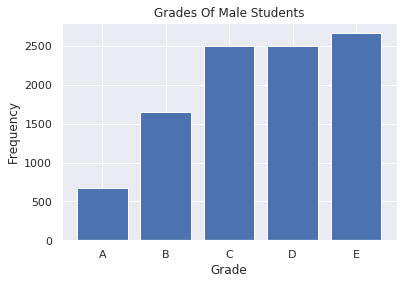

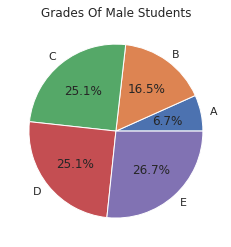

In [41]:
from matplotlib import pyplot

#绘制柱状图
def drawBar(grades):
    xticks = ['A', 'B', 'C', 'D', 'E']
    gradeGroup = {}
    # 对每一类成绩进行频数统计
    for grade in grades:
        gradeGroup[grade] = gradeGroup.get(grade, 0) + 1
    # 创建柱状图
    # 第一个参数为柱的横坐标
    # 第二个参数为柱的高度
    # 参数align为柱的对⻬方式,以第一个参数为参考标准
    pyplot.bar(range(5), [gradeGroup.get(xtick, 0) for xtick in xticks], align='center')
    # 设置柱的文字说明
    # 第一个参数为文字说明的横坐标
    # 第二个参数为文字说明的内容
    pyplot.xticks(range(5), xticks)
    #设置横坐标的文字说明
    pyplot.xlabel('Grade')
    #设置纵坐标的文字说明
    pyplot.ylabel('Frequency')
    #设置标题
    pyplot.title('Grades Of Male Students')
    #绘图
    pyplot.show()
    
# 绘制饼形图
def drawPie(grades):
    labels = ['A', 'B', 'C', 'D', 'E']
    gradeGroup = {}
    for grade in grades:
        gradeGroup[grade] = gradeGroup.get(grade, 0) + 1
    # 创建饼形图
    # 第一个参数为扇形的面积
    # labels参数为扇形的说明文字
    # autopct参数为扇形占比的显示格式
    pyplot.pie([gradeGroup.get(label, 0) for label in labels], labels=labels, autopct='%1.1f%%')
    pyplot.title('Grades Of Male Students')
    pyplot.show()
    
    
drawBar(grades)
drawPie(grades)


-------

#### 定量分析(直方图、累积曲线)


直方图类似于柱状图,是用柱的高度来指代频数,不同的是其将定量数据划分为若干连续的区间,在这些连续的
区间上绘制柱。使用Matplotlib对身高这一定量变量绘制直方图的代码如下:


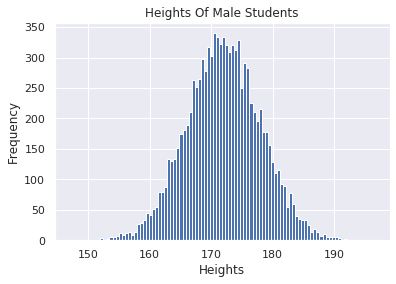

In [42]:
#绘制直方图

def drawHist(heights):
    # 创建直方图
    # 第一个参数为待绘制的定量数据,不同于定性数据,这里并没有事先进行频数统计
    # 第二个参数为划分的区间个数
    pyplot.hist(heights, 100)
    pyplot.xlabel('Heights')
    pyplot.ylabel('Frequency')
    pyplot.title('Heights Of Male Students')
    pyplot.show()

drawHist(heights)

/home/ghostwwl/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


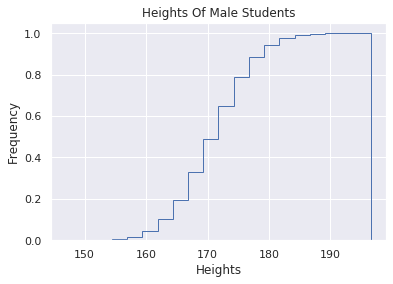

In [43]:
# 绘制累积曲线

def drawCumulativeHist(heights):
    # 创建累积曲线
    # 第一个参数为待绘制的定量数据
    # 第二个参数为划分的区间个数
    # normed参数为是否无量纲化
    # histtype参数为'step',绘制阶梯状的曲线
    # cumulative参数为是否累积
    pyplot.hist(heights, 20, normed=True, histtype='step', cumulative=True)
    pyplot.xlabel('Heights')
    pyplot.ylabel('Frequency')
    pyplot.title('Heights Of Male Students')
    pyplot.show()
    
drawCumulativeHist(heights)


------

#### 关系分析(散点图)
在散点图中,分别以自变量和因变量作为横纵坐标。当自变量与因变量线性相关时,在散点图中,点近似分布在
一条直线上。我们以身高作为自变量,体重作为因变量,讨论身高对体重的影响。使用Matplotlib绘制散点图的代码如
下:


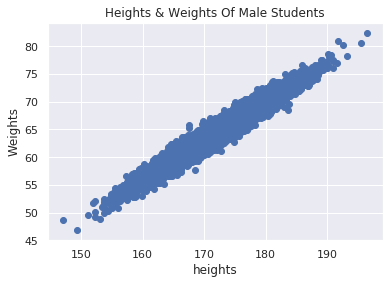

In [44]:
#绘制散点图
def drawScatter(heights, weights):
    #创建散点图
    #第一个参数为点的横坐标
    #第二个参数为点的纵坐标
    pyplot.scatter(heights, weights)
    pyplot.xlabel('heights')
    pyplot.ylabel('Weights')
    pyplot.title('Heights & Weights Of Male Students')
    pyplot.show()

drawScatter(heights, weights)

---------

#### 探索分析(箱形图)
在不明确数据分析的目标时,我们对数据进行一些探索性的分析,通过我们可以知道数据的中心位置,发散程度
以及偏差程度。使用Matplotlib绘制关于身高的箱形图的代码如下:

绘制出来的箱形图中,包含3种信息:
1. Q2所指的红线为中位数
2. Q1所指的蓝框下侧为下四分位数,Q3所指的蓝框上侧为上四分位数,Q3-Q1为四分为差。四分位差也是衡量数
据的发散程度的指标之一。
3. 上界线和下界线是距离中位数1.5倍四分位差的线,高于上界线或者低于下界线的数据为异常值。


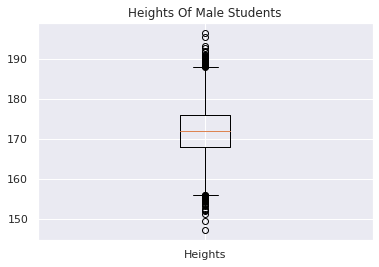

In [45]:
#绘制箱形图
def drawBox(heights):
    #创建箱形图
    #第一个参数为待绘制的定量数据
    #第二个参数为数据的文字说明
    pyplot.boxplot([heights], labels=['Heights'])
    pyplot.title('Heights Of Male Students')
    pyplot.show()

drawBox(heights)

# 从上到下  上界 Q3 Q2 Q1 下界 异常值


['method', 'number', 'orbital_period', 'mass', 'distance', 'year']


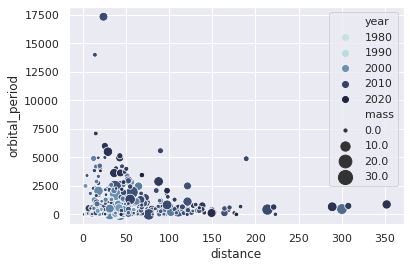

In [38]:
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()

nan = np.nan

dict_vars1 = dict_vars1 = {
    'method': {0: 'Radial Velocity', 1: 'Radial Velocity', 2: 'Radial Velocity', 3: 'Radial Velocity', 4: 'Radial Velocity', 5: 'Radial Velocity', 6: 'Radial Velocity', 7: 'Radial Velocity', 8: 'Radial Velocity', 9: 'Radial Velocity', 10: 'Radial Velocity', 11: 'Radial Velocity', 12: 'Radial Velocity', 13: 'Radial Velocity', 14: 'Radial Velocity', 15: 'Radial Velocity', 16: 'Radial Velocity', 17: 'Radial Velocity', 18: 'Radial Velocity', 19: 'Radial Velocity', 20: 'Radial Velocity', 21: 'Radial Velocity', 22: 'Radial Velocity', 23: 'Radial Velocity', 24: 'Radial Velocity', 25: 'Radial Velocity', 26: 'Radial Velocity', 27: 'Radial Velocity', 28: 'Radial Velocity', 29: 'Imaging', 30: 'Imaging', 31: 'Imaging', 32: 'Eclipse Timing Variations', 33: 'Imaging', 34: 'Imaging', 35: 'Imaging', 36: 'Imaging', 37: 'Eclipse Timing Variations', 38: 'Eclipse Timing Variations', 39: 'Eclipse Timing Variations', 40: 'Eclipse Timing Variations', 41: 'Eclipse Timing Variations', 42: 'Eclipse Timing Variations', 43: 'Eclipse Timing Variations', 44: 'Eclipse Timing Variations', 45: 'Radial Velocity', 46: 'Radial Velocity', 47: 'Imaging', 48: 'Radial Velocity', 49: 'Radial Velocity', 50: 'Radial Velocity', 51: 'Radial Velocity', 52: 'Radial Velocity', 53: 'Radial Velocity', 54: 'Imaging', 55: 'Radial Velocity', 56: 'Radial Velocity', 57: 'Radial Velocity', 58: 'Radial Velocity', 59: 'Radial Velocity', 60: 'Radial Velocity', 61: 'Radial Velocity', 62: 'Radial Velocity', 63: 'Radial Velocity', 64: 'Radial Velocity', 65: 'Radial Velocity', 66: 'Radial Velocity', 67: 'Radial Velocity', 68: 'Imaging', 69: 'Imaging', 70: 'Imaging', 71: 'Imaging', 72: 'Imaging', 73: 'Imaging', 74: 'Imaging', 75: 'Imaging', 76: 'Radial Velocity', 77: 'Radial Velocity', 78: 'Radial Velocity', 79: 'Radial Velocity', 80: 'Radial Velocity', 81: 'Radial Velocity', 82: 'Radial Velocity', 83: 'Radial Velocity', 84: 'Radial Velocity', 85: 'Radial Velocity', 86: 'Radial Velocity', 87: 'Radial Velocity', 88: 'Radial Velocity', 89: 'Imaging', 90: 'Imaging', 91: 'Transit', 92: 'Transit', 93: 'Transit', 94: 'Transit', 95: 'Transit', 96: 'Transit', 97: 'Transit', 98: 'Radial Velocity', 99: 'Transit', 100: 'Transit', 101: 'Transit', 102: 'Transit', 103: 'Transit', 104: 'Transit', 105: 'Transit', 106: 'Transit', 107: 'Transit', 108: 'Transit', 109: 'Transit', 110: 'Transit', 111: 'Transit', 112: 'Transit', 113: 'Astrometry', 114: 'Radial Velocity', 115: 'Radial Velocity', 116: 'Radial Velocity', 117: 'Radial Velocity', 118: 'Radial Velocity', 119: 'Radial Velocity', 120: 'Radial Velocity', 121: 'Radial Velocity', 122: 'Radial Velocity', 123: 'Radial Velocity', 124: 'Imaging', 125: 'Radial Velocity', 126: 'Radial Velocity', 127: 'Radial Velocity', 128: 'Radial Velocity', 129: 'Radial Velocity', 130: 'Radial Velocity', 131: 'Radial Velocity', 132: 'Radial Velocity', 133: 'Radial Velocity', 134: 'Radial Velocity', 135: 'Radial Velocity', 136: 'Radial Velocity', 137: 'Radial Velocity', 138: 'Radial Velocity', 139: 'Radial Velocity', 140: 'Radial Velocity', 141: 'Radial Velocity', 142: 'Radial Velocity', 143: 'Radial Velocity', 144: 'Radial Velocity', 145: 'Radial Velocity', 146: 'Transit', 147: 'Radial Velocity', 148: 'Radial Velocity', 149: 'Radial Velocity', 150: 'Imaging', 151: 'Transit', 152: 'Transit', 153: 'Transit', 154: 'Transit', 155: 'Transit', 156: 'Transit', 157: 'Transit', 158: 'Transit', 159: 'Transit', 160: 'Transit', 161: 'Radial Velocity', 162: 'Transit', 163: 'Transit', 164: 'Transit', 165: 'Transit', 166: 'Radial Velocity', 167: 'Transit', 168: 'Transit', 169: 'Transit', 170: 'Transit', 171: 'Transit', 172: 'Transit', 173: 'Transit', 174: 'Transit', 175: 'Transit', 176: 'Transit', 177: 'Transit', 178: 'Transit', 179: 'Transit', 180: 'Transit', 181: 'Radial Velocity', 182: 'Transit', 183: 'Transit', 184: 'Transit', 185: 'Transit', 186: 'Transit', 187: 'Transit', 188: 'Transit', 189: 'Transit', 190: 'Transit', 191: 'Transit', 192: 'Transit', 193: 'Transit', 194: 'Transit', 195: 'Transit', 196: 'Transit', 197: 'Transit', 198: 'Radial Velocity', 199: 'Radial Velocity', 200: 'Radial Velocity', 201: 'Radial Velocity', 202: 'Radial Velocity', 203: 'Radial Velocity', 204: 'Radial Velocity', 205: 'Radial Velocity', 206: 'Radial Velocity', 207: 'Radial Velocity', 208: 'Radial Velocity', 209: 'Radial Velocity', 210: 'Radial Velocity', 211: 'Radial Velocity', 212: 'Radial Velocity', 213: 'Radial Velocity', 214: 'Radial Velocity', 215: 'Radial Velocity', 216: 'Radial Velocity', 217: 'Radial Velocity', 218: 'Radial Velocity', 219: 'Radial Velocity', 220: 'Radial Velocity', 221: 'Radial Velocity', 222: 'Radial Velocity', 223: 'Radial Velocity', 224: 'Radial Velocity', 225: 'Radial Velocity', 226: 'Radial Velocity', 227: 'Radial Velocity', 228: 'Radial Velocity', 229: 'Radial Velocity', 230: 'Radial Velocity', 231: 'Radial Velocity', 232: 'Radial Velocity', 233: 'Radial Velocity', 234: 'Radial Velocity', 235: 'Radial Velocity', 236: 'Radial Velocity', 237: 'Radial Velocity', 238: 'Radial Velocity', 239: 'Radial Velocity', 240: 'Radial Velocity', 241: 'Radial Velocity', 242: 'Radial Velocity', 243: 'Radial Velocity', 244: 'Radial Velocity', 245: 'Radial Velocity', 246: 'Radial Velocity', 247: 'Radial Velocity', 248: 'Radial Velocity', 249: 'Radial Velocity', 250: 'Radial Velocity', 251: 'Radial Velocity', 252: 'Radial Velocity', 253: 'Radial Velocity', 254: 'Radial Velocity', 255: 'Radial Velocity', 256: 'Radial Velocity', 257: 'Radial Velocity', 258: 'Radial Velocity', 259: 'Radial Velocity', 260: 'Radial Velocity', 261: 'Radial Velocity', 262: 'Radial Velocity', 263: 'Radial Velocity', 264: 'Radial Velocity', 265: 'Radial Velocity', 266: 'Radial Velocity', 267: 'Radial Velocity', 268: 'Radial Velocity', 269: 'Radial Velocity', 270: 'Radial Velocity', 271: 'Radial Velocity', 272: 'Radial Velocity', 273: 'Radial Velocity', 274: 'Radial Velocity', 275: 'Radial Velocity', 276: 'Radial Velocity', 277: 'Radial Velocity', 278: 'Radial Velocity', 279: 'Radial Velocity', 280: 'Radial Velocity', 281: 'Radial Velocity', 282: 'Radial Velocity', 283: 'Radial Velocity', 284: 'Radial Velocity', 285: 'Radial Velocity', 286: 'Radial Velocity', 287: 'Radial Velocity', 288: 'Radial Velocity', 289: 'Radial Velocity', 290: 'Radial Velocity', 291: 'Radial Velocity', 292: 'Radial Velocity', 293: 'Radial Velocity', 294: 'Radial Velocity', 295: 'Radial Velocity', 296: 'Radial Velocity', 297: 'Radial Velocity', 298: 'Radial Velocity', 299: 'Radial Velocity', 300: 'Radial Velocity', 301: 'Radial Velocity', 302: 'Radial Velocity', 303: 'Radial Velocity', 304: 'Radial Velocity', 305: 'Radial Velocity', 306: 'Radial Velocity', 307: 'Radial Velocity', 308: 'Radial Velocity', 309: 'Radial Velocity', 310: 'Radial Velocity', 311: 'Radial Velocity', 312: 'Radial Velocity', 313: 'Radial Velocity', 314: 'Radial Velocity', 315: 'Radial Velocity', 316: 'Radial Velocity', 317: 'Radial Velocity', 318: 'Radial Velocity', 319: 'Radial Velocity', 320: 'Radial Velocity', 321: 'Radial Velocity', 322: 'Radial Velocity', 323: 'Radial Velocity', 324: 'Radial Velocity', 325: 'Radial Velocity', 326: 'Radial Velocity', 327: 'Radial Velocity', 328: 'Radial Velocity', 329: 'Radial Velocity', 330: 'Radial Velocity', 331: 'Radial Velocity', 332: 'Radial Velocity', 333: 'Radial Velocity', 334: 'Radial Velocity', 335: 'Radial Velocity', 336: 'Radial Velocity', 337: 'Radial Velocity', 338: 'Radial Velocity', 339: 'Radial Velocity', 340: 'Radial Velocity', 341: 'Radial Velocity', 342: 'Radial Velocity', 343: 'Radial Velocity', 344: 'Radial Velocity', 345: 'Radial Velocity', 346: 'Radial Velocity', 347: 'Radial Velocity', 348: 'Radial Velocity', 349: 'Radial Velocity', 350: 'Radial Velocity', 351: 'Radial Velocity', 352: 'Radial Velocity', 353: 'Radial Velocity', 354: 'Radial Velocity', 355: 'Radial Velocity', 356: 'Radial Velocity', 357: 'Radial Velocity', 358: 'Radial Velocity', 359: 'Radial Velocity', 360: 'Radial Velocity', 361: 'Radial Velocity', 362: 'Radial Velocity', 363: 'Radial Velocity', 364: 'Radial Velocity', 365: 'Radial Velocity', 366: 'Radial Velocity', 367: 'Radial Velocity', 368: 'Radial Velocity', 369: 'Radial Velocity', 370: 'Radial Velocity', 371: 'Radial Velocity', 372: 'Radial Velocity', 373: 'Radial Velocity', 374: 'Radial Velocity', 375: 'Radial Velocity', 376: 'Radial Velocity', 377: 'Radial Velocity', 378: 'Radial Velocity', 379: 'Radial Velocity', 380: 'Radial Velocity', 381: 'Radial Velocity', 382: 'Radial Velocity', 383: 'Radial Velocity', 384: 'Radial Velocity', 385: 'Radial Velocity', 386: 'Radial Velocity', 387: 'Radial Velocity', 388: 'Radial Velocity', 389: 'Radial Velocity', 390: 'Radial Velocity', 391: 'Radial Velocity', 392: 'Imaging', 393: 'Radial Velocity', 394: 'Radial Velocity', 395: 'Radial Velocity', 396: 'Radial Velocity', 397: 'Radial Velocity', 398: 'Radial Velocity', 399: 'Radial Velocity', 400: 'Radial Velocity', 401: 'Radial Velocity', 402: 'Radial Velocity', 403: 'Radial Velocity', 404: 'Radial Velocity', 405: 'Radial Velocity', 406: 'Radial Velocity', 407: 'Radial Velocity', 408: 'Radial Velocity', 409: 'Radial Velocity', 410: 'Radial Velocity', 411: 'Radial Velocity', 412: 'Radial Velocity', 413: 'Radial Velocity', 414: 'Radial Velocity', 415: 'Radial Velocity', 416: 'Radial Velocity', 417: 'Radial Velocity', 418: 'Radial Velocity', 419: 'Radial Velocity', 420: 'Radial Velocity', 421: 'Radial Velocity', 422: 'Radial Velocity', 423: 'Imaging', 424: 'Radial Velocity', 425: 'Radial Velocity', 426: 'Radial Velocity', 427: 'Radial Velocity', 428: 'Radial Velocity', 429: 'Radial Velocity', 430: 'Radial Velocity', 431: 'Radial Velocity', 432: 'Radial Velocity', 433: 'Radial Velocity', 434: 'Radial Velocity', 435: 'Radial Velocity', 436: 'Radial Velocity', 437: 'Radial Velocity', 438: 'Radial Velocity', 439: 'Radial Velocity', 440: 'Radial Velocity', 441: 'Radial Velocity', 442: 'Radial Velocity', 443: 'Radial Velocity', 444: 'Radial Velocity', 445: 'Radial Velocity', 446: 'Radial Velocity', 447: 'Radial Velocity', 448: 'Radial Velocity', 449: 'Radial Velocity', 450: 'Radial Velocity', 451: 'Radial Velocity', 452: 'Radial Velocity', 453: 'Radial Velocity', 454: 'Radial Velocity', 455: 'Radial Velocity', 456: 'Radial Velocity', 457: 'Radial Velocity', 458: 'Radial Velocity', 459: 'Radial Velocity', 460: 'Radial Velocity', 461: 'Radial Velocity', 462: 'Radial Velocity', 463: 'Radial Velocity', 464: 'Radial Velocity', 465: 'Radial Velocity', 466: 'Radial Velocity', 467: 'Radial Velocity', 468: 'Radial Velocity', 469: 'Radial Velocity', 470: 'Radial Velocity', 471: 'Radial Velocity', 472: 'Radial Velocity', 473: 'Radial Velocity', 474: 'Radial Velocity', 475: 'Radial Velocity', 476: 'Radial Velocity', 477: 'Radial Velocity', 478: 'Radial Velocity', 479: 'Radial Velocity', 480: 'Radial Velocity', 481: 'Radial Velocity', 482: 'Radial Velocity', 483: 'Radial Velocity', 484: 'Radial Velocity', 485: 'Radial Velocity', 486: 'Radial Velocity', 487: 'Radial Velocity', 488: 'Radial Velocity', 489: 'Radial Velocity', 490: 'Radial Velocity', 491: 'Radial Velocity', 492: 'Radial Velocity', 493: 'Radial Velocity', 494: 'Radial Velocity', 495: 'Radial Velocity', 496: 'Radial Velocity', 497: 'Radial Velocity', 498: 'Radial Velocity', 499: 'Radial Velocity', 500: 'Radial Velocity', 501: 'Radial Velocity', 502: 'Radial Velocity', 503: 'Radial Velocity', 504: 'Radial Velocity', 505: 'Radial Velocity', 506: 'Radial Velocity', 507: 'Radial Velocity', 508: 'Radial Velocity', 509: 'Radial Velocity', 510: 'Radial Velocity', 511: 'Radial Velocity', 512: 'Radial Velocity', 513: 'Radial Velocity', 514: 'Radial Velocity', 515: 'Radial Velocity', 516: 'Radial Velocity', 517: 'Radial Velocity', 518: 'Radial Velocity', 519: 'Radial Velocity', 520: 'Radial Velocity', 521: 'Radial Velocity', 522: 'Radial Velocity', 523: 'Radial Velocity', 524: 'Radial Velocity', 525: 'Radial Velocity', 526: 'Radial Velocity', 527: 'Radial Velocity', 528: 'Radial Velocity', 529: 'Radial Velocity', 530: 'Radial Velocity', 531: 'Radial Velocity', 532: 'Radial Velocity', 533: 'Radial Velocity', 534: 'Radial Velocity', 535: 'Radial Velocity', 536: 'Radial Velocity', 537: 'Astrometry', 538: 'Radial Velocity', 539: 'Radial Velocity', 540: 'Radial Velocity', 541: 'Radial Velocity', 542: 'Radial Velocity', 543: 'Radial Velocity', 544: 'Radial Velocity', 545: 'Radial Velocity', 546: 'Radial Velocity', 547: 'Radial Velocity', 548: 'Radial Velocity', 549: 'Radial Velocity', 550: 'Radial Velocity', 551: 'Radial Velocity', 552: 'Radial Velocity', 553: 'Radial Velocity', 554: 'Radial Velocity', 555: 'Radial Velocity', 556: 'Radial Velocity', 557: 'Radial Velocity', 558: 'Radial Velocity', 559: 'Radial Velocity', 560: 'Radial Velocity', 561: 'Radial Velocity', 562: 'Radial Velocity', 563: 'Radial Velocity', 564: 'Radial Velocity', 565: 'Radial Velocity', 566: 'Radial Velocity', 567: 'Radial Velocity', 568: 'Radial Velocity', 569: 'Radial Velocity', 570: 'Radial Velocity', 571: 'Radial Velocity', 572: 'Radial Velocity', 573: 'Radial Velocity', 574: 'Radial Velocity', 575: 'Radial Velocity', 576: 'Radial Velocity', 577: 'Imaging', 578: 'Radial Velocity', 579: 'Radial Velocity', 580: 'Radial Velocity', 581: 'Radial Velocity', 582: 'Radial Velocity', 583: 'Radial Velocity', 584: 'Radial Velocity', 585: 'Radial Velocity', 586: 'Radial Velocity', 587: 'Radial Velocity', 588: 'Radial Velocity', 589: 'Radial Velocity', 590: 'Radial Velocity', 591: 'Radial Velocity', 592: 'Radial Velocity', 593: 'Radial Velocity', 594: 'Radial Velocity', 595: 'Radial Velocity', 596: 'Radial Velocity', 597: 'Radial Velocity', 598: 'Radial Velocity', 599: 'Radial Velocity', 600: 'Radial Velocity', 601: 'Radial Velocity', 602: 'Radial Velocity', 603: 'Radial Velocity', 604: 'Radial Velocity', 605: 'Radial Velocity', 606: 'Radial Velocity', 607: 'Radial Velocity', 608: 'Radial Velocity', 609: 'Radial Velocity', 610: 'Radial Velocity', 611: 'Radial Velocity', 612: 'Radial Velocity', 613: 'Radial Velocity', 614: 'Radial Velocity', 615: 'Radial Velocity', 616: 'Radial Velocity', 617: 'Radial Velocity', 618: 'Radial Velocity', 619: 'Radial Velocity', 620: 'Radial Velocity', 621: 'Radial Velocity', 622: 'Radial Velocity', 623: 'Radial Velocity', 624: 'Radial Velocity', 625: 'Radial Velocity', 626: 'Radial Velocity', 627: 'Radial Velocity', 628: 'Radial Velocity', 629: 'Radial Velocity', 630: 'Radial Velocity', 631: 'Radial Velocity', 632: 'Radial Velocity', 633: 'Radial Velocity', 634: 'Radial Velocity', 635: 'Imaging', 636: 'Radial Velocity', 637: 'Radial Velocity', 638: 'Radial Velocity', 639: 'Imaging', 640: 'Radial Velocity', 641: 'Radial Velocity', 642: 'Radial Velocity', 643: 'Imaging', 644: 'Imaging', 645: 'Imaging', 646: 'Imaging', 647: 'Transit', 648: 'Transit', 649: 'Transit', 650: 'Transit', 651: 'Transit', 652: 'Transit', 653: 'Transit', 654: 'Transit', 655: 'Transit', 656: 'Transit', 657: 'Transit', 658: 'Transit', 659: 'Transit', 660: 'Transit', 661: 'Transit', 662: 'Transit', 663: 'Transit', 664: 'Transit', 665: 'Transit', 666: 'Transit', 667: 'Transit', 668: 'Transit', 669: 'Transit', 670: 'Transit', 671: 'Transit', 672: 'Transit', 673: 'Transit', 674: 'Transit', 675: 'Transit', 676: 'Transit', 677: 'Transit', 678: 'Transit', 679: 'Transit', 680: 'Transit Timing Variations', 681: 'Transit', 682: 'Transit', 683: 'Transit', 684: 'Transit', 685: 'Transit', 686: 'Transit', 687: 'Transit', 688: 'Transit', 689: 'Transit', 690: 'Transit', 691: 'Transit', 692: 'Transit', 693: 'Transit', 694: 'Radial Velocity', 695: 'Transit', 696: 'Transit', 697: 'Transit', 698: 'Transit', 699: 'Transit', 700: 'Transit', 701: 'Transit', 702: 'Transit', 703: 'Transit', 704: 'Transit', 705: 'Transit', 706: 'Transit', 707: 'Transit', 708: 'Transit', 709: 'Transit', 710: 'Transit', 711: 'Transit', 712: 'Transit', 713: 'Transit', 714: 'Transit', 715: 'Transit', 716: 'Transit', 717: 'Transit', 718: 'Transit', 719: 'Transit', 720: 'Transit', 721: 'Transit', 722: 'Transit', 723: 'Transit', 724: 'Transit', 725: 'Transit', 726: 'Transit', 727: 'Transit', 728: 'Transit', 729: 'Transit', 730: 'Transit', 731: 'Transit', 732: 'Transit', 733: 'Transit', 734: 'Transit', 735: 'Transit', 736: 'Transit Timing Variations', 737: 'Transit', 738: 'Transit', 739: 'Transit', 740: 'Transit', 741: 'Transit', 742: 'Radial Velocity', 743: 'Transit', 744: 'Transit', 745: 'Transit', 746: 'Transit', 747: 'Transit', 748: 'Transit', 749: 'Transit Timing Variations', 750: 'Transit', 751: 'Transit', 752: 'Transit', 753: 'Transit', 754: 'Transit', 755: 'Transit', 756: 'Transit', 757: 'Transit', 758: 'Transit', 759: 'Transit', 760: 'Transit', 761: 'Transit', 762: 'Transit', 763: 'Transit', 764: 'Transit', 765: 'Transit', 766: 'Transit', 767: 'Transit', 768: 'Transit', 769: 'Transit', 770: 'Transit', 771: 'Transit', 772: 'Transit', 773: 'Transit', 774: 'Transit', 775: 'Transit', 776: 'Transit', 777: 'Transit', 778: 'Transit', 779: 'Transit', 780: 'Transit', 781: 'Transit', 782: 'Transit', 783: 'Transit', 784: 'Radial Velocity', 785: 'Transit', 786: 'Transit', 787: 'Orbital Brightness Modulation', 788: 'Orbital Brightness Modulation', 789: 'Transit', 790: 'Transit', 791: 'Transit', 792: 'Orbital Brightness Modulation', 793: 'Transit', 794: 'Transit', 795: 'Transit', 796: 'Transit', 797: 'Transit', 798: 'Transit', 799: 'Transit', 800: 'Transit', 801: 'Transit', 802: 'Transit', 803: 'Transit', 804: 'Transit', 805: 'Transit', 806: 'Transit', 807: 'Transit', 808: 'Transit', 809: 'Transit', 810: 'Transit', 811: 'Transit', 812: 'Transit', 813: 'Transit Timing Variations', 814: 'Transit', 815: 'Transit', 816: 'Transit', 817: 'Transit', 818: 'Transit', 819: 'Transit', 820: 'Transit', 821: 'Transit', 822: 'Transit', 823: 'Transit', 824: 'Transit', 825: 'Transit', 826: 'Transit', 827: 'Transit', 828: 'Transit', 829: 'Radial Velocity', 830: 'Transit', 831: 'Radial Velocity', 832: 'Transit', 833: 'Transit', 834: 'Transit', 835: 'Radial Velocity', 836: 'Transit', 837: 'Transit', 838: 'Transit', 839: 'Transit', 840: 'Transit', 841: 'Transit', 842: 'Transit', 843: 'Transit', 844: 'Transit', 845: 'Transit', 846: 'Transit', 847: 'Transit', 848: 'Transit', 849: 'Transit', 850: 'Transit', 851: 'Transit', 852: 'Transit', 853: 'Transit', 854: 'Transit', 855: 'Transit', 856: 'Transit', 857: 'Transit', 858: 'Transit', 859: 'Transit', 860: 'Transit', 861: 'Transit', 862: 'Transit', 863: 'Transit', 864: 'Transit', 865: 'Transit', 866: 'Transit', 867: 'Transit', 868: 'Transit', 869: 'Transit', 870: 'Transit', 871: 'Transit', 872: 'Transit', 873: 'Transit', 874: 'Transit', 875: 'Transit', 876: 'Transit', 877: 'Transit', 878: 'Transit', 879: 'Transit', 880: 'Transit', 881: 'Transit', 882: 'Transit', 883: 'Transit', 884: 'Transit', 885: 'Transit', 886: 'Transit', 887: 'Transit', 888: 'Transit', 889: 'Transit', 890: 'Transit', 891: 'Transit', 892: 'Transit', 893: 'Radial Velocity', 894: 'Transit', 895: 'Transit', 896: 'Transit', 897: 'Transit', 898: 'Transit', 899: 'Transit', 900: 'Imaging', 901: 'Transit', 902: 'Microlensing', 903: 'Microlensing', 904: 'Microlensing', 905: 'Microlensing', 906: 'Microlensing', 907: 'Microlensing', 908: 'Microlensing', 909: 'Microlensing', 910: 'Microlensing', 911: 'Microlensing', 912: 'Microlensing', 913: 'Radial Velocity', 914: 'Radial Velocity', 915: 'Radial Velocity', 916: 'Radial Velocity', 917: 'Microlensing', 918: 'Microlensing', 919: 'Microlensing', 920: 'Microlensing', 921: 'Microlensing', 922: 'Microlensing', 923: 'Microlensing', 924: 'Microlensing', 925: 'Microlensing', 926: 'Microlensing', 927: 'Microlensing', 928: 'Microlensing', 929: 'Transit', 930: 'Transit', 931: 'Transit', 932: 'Transit', 933: 'Transit', 934: 'Transit', 935: 'Transit', 936: 'Transit', 937: 'Imaging', 938: 'Transit', 939: 'Radial Velocity', 940: 'Radial Velocity', 941: 'Pulsar Timing', 942: 'Pulsar Timing', 943: 'Pulsar Timing', 944: 'Pulsar Timing', 945: 'Pulsar Timing', 946: 'Transit', 947: 'Transit', 948: 'Imaging', 949: 'Imaging', 950: 'Imaging', 951: 'Transit', 952: 'Transit', 953: 'Transit', 954: 'Transit', 955: 'Transit', 956: 'Transit', 957: 'Imaging', 958: 'Pulsation Timing Variations', 959: 'Transit', 960: 'Transit', 961: 'Transit', 962: 'Transit', 963: 'Transit', 964: 'Transit', 965: 'Transit', 966: 'Transit', 967: 'Transit', 968: 'Transit', 969: 'Transit', 970: 'Transit', 971: 'Transit', 972: 'Transit', 973: 'Transit', 974: 'Transit', 975: 'Transit', 976: 'Transit', 977: 'Transit', 978: 'Transit', 979: 'Transit', 980: 'Transit', 981: 'Transit', 982: 'Transit', 983: 'Transit', 984: 'Transit', 985: 'Transit', 986: 'Transit', 987: 'Transit', 988: 'Transit', 989: 'Transit', 990: 'Transit', 991: 'Transit', 992: 'Transit', 993: 'Transit', 994: 'Transit', 995: 'Transit', 996: 'Transit', 997: 'Transit', 998: 'Transit', 999: 'Transit', 1000: 'Transit', 1001: 'Transit', 1002: 'Transit', 1003: 'Transit', 1004: 'Transit', 1005: 'Transit', 1006: 'Transit', 1007: 'Transit', 1008: 'Transit', 1009: 'Transit', 1010: 'Transit', 1011: 'Transit', 1012: 'Transit', 1013: 'Transit', 1014: 'Transit', 1015: 'Transit', 1016: 'Transit', 1017: 'Transit', 1018: 'Transit', 1019: 'Transit', 1020: 'Transit', 1021: 'Transit', 1022: 'Transit', 1023: 'Transit', 1024: 'Transit', 1025: 'Transit', 1026: 'Transit', 1027: 'Imaging', 1028: 'Transit', 1029: 'Imaging', 1030: 'Transit', 1031: 'Transit', 1032: 'Transit', 1033: 'Transit', 1034: 'Transit'}, 
    'number': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 2, 10: 2, 11: 1, 12: 1, 13: 3, 14: 3, 15: 3, 16: 1, 17: 5, 18: 5, 19: 5, 20: 5, 21: 5, 22: 3, 23: 3, 24: 3, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 2, 38: 2, 39: 2, 40: 2, 41: 1, 42: 1, 43: 2, 44: 2, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 2, 57: 2, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 4, 65: 4, 66: 4, 67: 4, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 2, 80: 2, 81: 2, 82: 2, 83: 1, 84: 1, 85: 2, 86: 2, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 2, 98: 2, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 3, 116: 3, 117: 3, 118: 1, 119: 2, 120: 2, 121: 1, 122: 1, 123: 1, 124: 1, 125: 4, 126: 4, 127: 4, 128: 4, 129: 1, 130: 6, 131: 6, 132: 6, 133: 6, 134: 6, 135: 6, 136: 1, 137: 3, 138: 3, 139: 3, 140: 1, 141: 1, 142: 4, 143: 4, 144: 4, 145: 4, 146: 1, 147: 1, 148: 1, 149: 1, 150: 1, 151: 1, 152: 1, 153: 1, 154: 1, 155: 1, 156: 1, 157: 1, 158: 1, 159: 1, 160: 2, 161: 2, 162: 1, 163: 1, 164: 1, 165: 2, 166: 2, 167: 1, 168: 1, 169: 1, 170: 1, 171: 1, 172: 1, 173: 1, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 2, 181: 2, 182: 1, 183: 1, 184: 1, 185: 1, 186: 1, 187: 1, 188: 1, 189: 1, 190: 1, 191: 1, 192: 1, 193: 1, 194: 1, 195: 1, 196: 1, 197: 1, 198: 2, 199: 2, 200: 2, 201: 2, 202: 1, 203: 1, 204: 1, 205: 1, 206: 1, 207: 1, 208: 1, 209: 1, 210: 1, 211: 1, 212: 1, 213: 2, 214: 2, 215: 1, 216: 1, 217: 1, 218: 1, 219: 1, 220: 1, 221: 1, 222: 2, 223: 2, 224: 1, 225: 1, 226: 1, 227: 1, 228: 2, 229: 2, 230: 6, 231: 6, 232: 6, 233: 6, 234: 6, 235: 6, 236: 1, 237: 1, 238: 2, 239: 2, 240: 1, 241: 2, 242: 2, 243: 2, 244: 2, 245: 1, 246: 2, 247: 2, 248: 2, 249: 2, 250: 1, 251: 1, 252: 1, 253: 1, 254: 1, 255: 1, 256: 1, 257: 1, 258: 1, 259: 2, 260: 2, 261: 1, 262: 3, 263: 3, 264: 3, 265: 2, 266: 2, 267: 1, 268: 1, 269: 2, 270: 2, 271: 1, 272: 1, 273: 1, 274: 1, 275: 1, 276: 1, 277: 1, 278: 1, 279: 1, 280: 1, 281: 1, 282: 1, 283: 1, 284: 1, 285: 1, 286: 1, 287: 3, 288: 3, 289: 3, 290: 1, 291: 1, 292: 1, 293: 1, 294: 1, 295: 1, 296: 3, 297: 3, 298: 3, 299: 1, 300: 2, 301: 2, 302: 3, 303: 3, 304: 3, 305: 2, 306: 2, 307: 1, 308: 1, 309: 6, 310: 6, 311: 6, 312: 6, 313: 6, 314: 6, 315: 1, 316: 1, 317: 1, 318: 2, 319: 2, 320: 1, 321: 1, 322: 1, 323: 1, 324: 1, 325: 2, 326: 2, 327: 1, 328: 1, 329: 1, 330: 2, 331: 2, 332: 2, 333: 2, 334: 1, 335: 1, 336: 1, 337: 1, 338: 2, 339: 2, 340: 1, 341: 1, 342: 2, 343: 2, 344: 1, 345: 1, 346: 1, 347: 2, 348: 2, 349: 1, 350: 1, 351: 1, 352: 3, 353: 3, 354: 3, 355: 1, 356: 1, 357: 1, 358: 1, 359: 1, 360: 2, 361: 2, 362: 1, 363: 3, 364: 3, 365: 3, 366: 1, 367: 1, 368: 1, 369: 1, 370: 1, 371: 1, 372: 1, 373: 1, 374: 2, 375: 2, 376: 1, 377: 1, 378: 1, 379: 1, 380: 1, 381: 1, 382: 1, 383: 1, 384: 1, 385: 1, 386: 1, 387: 1, 388: 1, 389: 1, 390: 2, 391: 2, 392: 1, 393: 1, 394: 1, 395: 1, 396: 1, 397: 2, 398: 2, 399: 1, 400: 1, 401: 1, 402: 1, 403: 2, 404: 2, 405: 1, 406: 1, 407: 1, 408: 1, 409: 1, 410: 1, 411: 2, 412: 2, 413: 1, 414: 1, 415: 1, 416: 1, 417: 1, 418: 1, 419: 1, 420: 1, 421: 1, 422: 1, 423: 1, 424: 1, 425: 1, 426: 1, 427: 2, 428: 2, 429: 1, 430: 2, 431: 2, 432: 1, 433: 1, 434: 1, 435: 1, 436: 2, 437: 2, 438: 2, 439: 2, 440: 1, 441: 1, 442: 1, 443: 1, 444: 1, 445: 1, 446: 1, 447: 1, 448: 1, 449: 1, 450: 1, 451: 3, 452: 3, 453: 3, 454: 1, 455: 1, 456: 1, 457: 2, 458: 2, 459: 1, 460: 1, 461: 1, 462: 1, 463: 1, 464: 1, 465: 2, 466: 2, 467: 2, 468: 2, 469: 3, 470: 3, 471: 3, 472: 1, 473: 3, 474: 3, 475: 3, 476: 1, 477: 1, 478: 1, 479: 1, 480: 1, 481: 1, 482: 1, 483: 1, 484: 1, 485: 2, 486: 2, 487: 1, 488: 1, 489: 1, 490: 1, 491: 1, 492: 1, 493: 1, 494: 1, 495: 1, 496: 1, 497: 1, 498: 1, 499: 1, 500: 2, 501: 2, 502: 2, 503: 2, 504: 1, 505: 1, 506: 1, 507: 1, 508: 1, 509: 1, 510: 2, 511: 2, 512: 2, 513: 2, 514: 4, 515: 4, 516: 4, 517: 4, 518: 1, 519: 2, 520: 2, 521: 1, 522: 1, 523: 1, 524: 1, 525: 1, 526: 2, 527: 2, 528: 1, 529: 2, 530: 2, 531: 1, 532: 1, 533: 1, 534: 1, 535: 1, 536: 1, 537: 1, 538: 2, 539: 2, 540: 1, 541: 1, 542: 1, 543: 1, 544: 1, 545: 1, 546: 3, 547: 3, 548: 3, 549: 1, 550: 2, 551: 2, 552: 1, 553: 1, 554: 2, 555: 2, 556: 1, 557: 1, 558: 1, 559: 1, 560: 2, 561: 2, 562: 1, 563: 1, 564: 1, 565: 2, 566: 2, 567: 1, 568: 1, 569: 1, 570: 1, 571: 1, 572: 1, 573: 2, 574: 2, 575: 2, 576: 2, 577: 1, 578: 3, 579: 3, 580: 3, 581: 1, 582: 1, 583: 1, 584: 2, 585: 2, 586: 1, 587: 1, 588: 1, 589: 1, 590: 1, 591: 1, 592: 1, 593: 1, 594: 2, 595: 2, 596: 2, 597: 2, 598: 2, 599: 2, 600: 1, 601: 1, 602: 1, 603: 2, 604: 2, 605: 1, 606: 1, 607: 1, 608: 1, 609: 1, 610: 1, 611: 1, 612: 1, 613: 1, 614: 1, 615: 1, 616: 1, 617: 1, 618: 1, 619: 1, 620: 1, 621: 1, 622: 1, 623: 1, 624: 2, 625: 2, 626: 1, 627: 1, 628: 3, 629: 3, 630: 3, 631: 1, 632: 3, 633: 3, 634: 3, 635: 1, 636: 1, 637: 1, 638: 1, 639: 1, 640: 1, 641: 1, 642: 1, 643: 4, 644: 4, 645: 4, 646: 4, 647: 1, 648: 1, 649: 1, 650: 1, 651: 1, 652: 1, 653: 1, 654: 1, 655: 1, 656: 1, 657: 1, 658: 1, 659: 3, 660: 3, 661: 3, 662: 2, 663: 2, 664: 6, 665: 6, 666: 6, 667: 6, 668: 6, 669: 6, 670: 1, 671: 1, 672: 1, 673: 1, 674: 1, 675: 1, 676: 3, 677: 3, 678: 3, 679: 2, 680: 2, 681: 5, 682: 5, 683: 5, 684: 5, 685: 5, 686: 1, 687: 1, 688: 2, 689: 2, 690: 2, 691: 2, 692: 3, 693: 3, 694: 3, 695: 2, 696: 2, 697: 2, 698: 2, 699: 2, 700: 2, 701: 2, 702: 2, 703: 3, 704: 3, 705: 3, 706: 2, 707: 2, 708: 5, 709: 5, 710: 5, 711: 5, 712: 5, 713: 5, 714: 5, 715: 5, 716: 5, 717: 5, 718: 1, 719: 1, 720: 2, 721: 2, 722: 3, 723: 3, 724: 3, 725: 1, 726: 1, 727: 1, 728: 1, 729: 3, 730: 3, 731: 3, 732: 1, 733: 1, 734: 1, 735: 2, 736: 2, 737: 2, 738: 2, 739: 4, 740: 4, 741: 4, 742: 4, 743: 2, 744: 2, 745: 2, 746: 2, 747: 3, 748: 3, 749: 3, 750: 2, 751: 2, 752: 2, 753: 2, 754: 2, 755: 2, 756: 2, 757: 2, 758: 2, 759: 2, 760: 2, 761: 2, 762: 2, 763: 2, 764: 2, 765: 2, 766: 3, 767: 3, 768: 3, 769: 1, 770: 5, 771: 5, 772: 5, 773: 5, 774: 5, 775: 1, 776: 1, 777: 3, 778: 3, 779: 3, 780: 1, 781: 1, 782: 3, 783: 3, 784: 3, 785: 2, 786: 2, 787: 2, 788: 2, 789: 1, 790: 1, 791: 1, 792: 1, 793: 1, 794: 1, 795: 2, 796: 2, 797: 2, 798: 2, 799: 2, 800: 2, 801: 2, 802: 2, 803: 2, 804: 2, 805: 2, 806: 2, 807: 2, 808: 2, 809: 1, 810: 2, 811: 2, 812: 2, 813: 2, 814: 4, 815: 4, 816: 4, 817: 4, 818: 7, 819: 7, 820: 7, 821: 7, 822: 7, 823: 7, 824: 7, 825: 1, 826: 2, 827: 2, 828: 2, 829: 2, 830: 2, 831: 2, 832: 1, 833: 1, 834: 2, 835: 2, 836: 1, 837: 1, 838: 3, 839: 3, 840: 3, 841: 5, 842: 5, 843: 5, 844: 5, 845: 5, 846: 2, 847: 2, 848: 2, 849: 4, 850: 4, 851: 4, 852: 4, 853: 2, 854: 2, 855: 2, 856: 2, 857: 2, 858: 2, 859: 2, 860: 2, 861: 3, 862: 2, 863: 2, 864: 2, 865: 2, 866: 2, 867: 2, 868: 2, 869: 2, 870: 2, 871: 2, 872: 2, 873: 2, 874: 2, 875: 2, 876: 2, 877: 2, 878: 2, 879: 2, 880: 2, 881: 2, 882: 2, 883: 2, 884: 2, 885: 2, 886: 2, 887: 2, 888: 2, 889: 2, 890: 2, 891: 2, 892: 2, 893: 2, 894: 1, 895: 1, 896: 1, 897: 1, 898: 1, 899: 1, 900: 1, 901: 1, 902: 1, 903: 1, 904: 1, 905: 1, 906: 1, 907: 1, 908: 1, 909: 1, 910: 1, 911: 1, 912: 1, 913: 1, 914: 1, 915: 1, 916: 1, 917: 1, 918: 1, 919: 1, 920: 1, 921: 2, 922: 2, 923: 1, 924: 1, 925: 2, 926: 2, 927: 1, 928: 1, 929: 1, 930: 1, 931: 1, 932: 1, 933: 1, 934: 1, 935: 1, 936: 1, 937: 1, 938: 1, 939: 1, 940: 1, 941: 3, 942: 3, 943: 3, 944: 1, 945: 1, 946: 1, 947: 1, 948: 1, 949: 1, 950: 1, 951: 1, 952: 1, 953: 1, 954: 1, 955: 1, 956: 1, 957: 1, 958: 1, 959: 1, 960: 1, 961: 1, 962: 1, 963: 1, 964: 1, 965: 1, 966: 1, 967: 1, 968: 1, 969: 1, 970: 1, 971: 1, 972: 1, 973: 1, 974: 1, 975: 1, 976: 1, 977: 1, 978: 1, 979: 1, 980: 1, 981: 1, 982: 1, 983: 1, 984: 1, 985: 1, 986: 1, 987: 1, 988: 1, 989: 1, 990: 1, 991: 1, 992: 1, 993: 1, 994: 1, 995: 1, 996: 1, 997: 1, 998: 1, 999: 1, 1000: 1, 1001: 1, 1002: 1, 1003: 1, 1004: 1, 1005: 1, 1006: 1, 1007: 1, 1008: 1, 1009: 1, 1010: 1, 1011: 1, 1012: 1, 1013: 1, 1014: 1, 1015: 1, 1016: 1, 1017: 1, 1018: 1, 1019: 1, 1020: 1, 1021: 1, 1022: 1, 1023: 1, 1024: 1, 1025: 1, 1026: 1, 1027: 1, 1028: 1, 1029: 1, 1030: 1, 1031: 1, 1032: 1, 1033: 1, 1034: 1}, 
    'orbital_period': {0: 269.3, 1: 874.7739999999999, 2: 763.0, 3: 326.03, 4: 516.22, 5: 185.84, 6: 1773.4, 7: 798.5, 8: 993.3, 9: 452.8, 10: 883.0, 11: 335.1, 12: 479.1, 13: 1078.0, 14: 2391.0, 15: 14002.0, 16: 4.230785, 17: 14.651, 18: 44.38, 19: 4909.0, 20: 0.73654, 21: 261.2, 22: 4.215, 23: 38.021, 24: 123.01, 25: 116.6884, 26: 691.9, 27: 952.7, 28: 181.4, 29: nan, 30: nan, 31: nan, 32: 10220.0, 33: nan, 34: nan, 35: nan, 36: nan, 37: 5767.0, 38: 3321.0, 39: 5573.55, 40: 2883.5, 41: 2900.0, 42: 4343.5, 43: 5840.0, 44: 1916.25, 45: 380.8, 46: 3.2357, 47: 6000.0, 48: 2502.0, 49: 417.9, 50: 594.9, 51: 428.5, 52: 903.3, 53: 1251.0, 54: nan, 55: 136.75, 56: 530.32, 57: 3186.0, 58: 277.02, 59: 187.83, 60: 1630.0, 61: 39.845, 62: 3.3135, 63: 305.5, 64: 4.617033, 65: 241.25799999999998, 66: 1276.46, 67: 3848.86, 68: 318280.0, 69: nan, 70: nan, 71: nan, 72: 4639.15, 73: nan, 74: 7336.5, 75: 8679.7, 76: 655.6, 77: 714.3, 78: 3.48777, 79: 5.6, 80: 237.6, 81: 3.8728, 82: 125.94, 83: 268.94, 84: 137.48, 85: 379.63, 86: 621.99, 87: 578.2, 88: 392.6, 89: 10037.5, 90: nan, 91: 1.5089556999999998, 92: 1.7429935, 93: 4.2568, 94: 9.20205, 95: 4.0378962, 96: 8.886593, 97: 0.853585, 98: 3.698, 99: 6.21229, 100: 95.2738, 101: 13.2406, 102: 2.9943299999999997, 103: 2.828042, 104: 4.03519, 105: 1.51214, 106: 5.35227, 107: 3.7681, 108: 1.9000693, 109: 3.89713, 110: 9.24285, 111: 3.6313, 112: 3.5753199999999996, 113: 246.36, 114: 15.76491, 115: 8.631, 116: 25.6, 117: 603.0, 118: 2288.0, 119: 692.0, 120: 7100.0, 121: 4100.0, 122: 7.3709, 123: 2.64385, 124: nan, 125: 5.36874, 126: 12.9292, 127: 66.8, 128: 3.14942, 129: 598.3, 130: 7.2004, 131: 28.14, 132: 91.61, 133: 62.24, 134: 39.025999999999996, 135: 256.2, 136: 4.6938, 137: 1050.3, 138: 3.6, 139: 35.37, 140: 3416.0, 141: 1845.0, 142: 61.1166, 143: 30.0881, 144: 1.9377799999999998, 145: 124.26, 146: 1.58040482, 147: 133.71, 148: 3.33714, 149: 2.64561, 150: nan, 151: 4.4652934, 152: 5.633472900000001, 153: 2.899736, 154: 3.056536, 155: 2.788491, 156: 3.852985, 157: 3.0763776000000003, 158: 3.92289, 159: 3.2130598, 160: 2.91626, 161: 428.5, 162: 4.627669, 163: 10.863502, 164: 2.77596, 165: 10.338523, 166: 5584.0, 167: 5.508023000000001, 168: 4.0087779999999995, 169: 2.875317, 170: 4.124480999999999, 171: 3.21222, 172: 1.212884, 173: 3.3552400000000002, 174: 3.652836, 175: 4.234516, 176: 3.039577, 177: 3.257215, 178: 5.723186, 179: 2.810595, 180: 5.005425, 181: 1022.0, 182: 2.150008, 183: 3.474474, 184: 5.452654, 185: 3.6467059999999996, 186: 1.3273469999999998, 187: 2.7974360000000003, 188: 4.640382, 189: 3.5438699999999996, 190: 4.457243, 191: 2.6940470000000003, 192: 4.641878, 193: 3.3326870000000004, 194: 2.691548, 195: 3.4464589999999995, 196: 1.354133, 197: 3.547851, 198: 349.7, 199: 6005.0, 200: 5.7727, 201: 13.505, 202: 431.8, 203: 533.0, 204: 1183.0, 205: 3.4442, 206: 311.6, 207: 62.218, 208: 526.62, 209: 829.0, 210: 15.609000000000002, 211: 431.88, 212: 356.0, 213: 360.2, 214: 2732.0, 215: 675.0, 216: 777.0, 217: 792.6, 218: 177.11, 219: 22.09, 220: 2496.0, 221: 615.0, 222: 1275.0, 223: 4046.0, 224: 5.3978, 225: 1313.0, 226: 227.0, 227: 1634.0, 228: 30.052, 229: 192.9, 230: 5.75962, 231: 16.3567, 232: 49.747, 233: 122.72, 234: 602.0, 235: 2248.0, 236: 989.2, 237: 1075.2, 238: 1270.2, 239: 170.455, 240: 711.0, 241: 1945.0, 242: 37.91, 243: 262.709, 244: 1708.0, 245: 471.6, 246: 14.182, 247: 53.832, 248: 19.382, 249: 931.0, 250: 4218.0, 251: 75.523, 252: 17.24, 253: 990.0, 254: 465.1, 255: 359.9, 256: 21.21663, 257: 772.0, 258: 466.2, 259: 11.849, 260: 33.823, 261: 500.0, 262: 18.315, 263: 40.114000000000004, 264: 90.309, 265: 29.15, 266: 85.131, 267: 591.9, 268: 380.85, 269: 22.656, 270: 53.881, 271: 1214.0, 272: 738.459, 273: 528.07, 274: 1561.0, 275: 3668.0, 276: 1845.0, 277: 423.841, 278: 2208.0, 279: 17.991, 280: 1117.0, 281: 385.9, 282: 387.1, 283: 2819.6540000000005, 284: 1159.2, 285: 912.0, 286: 466.0, 287: 16.546, 288: 51.284, 289: 274.49, 290: 326.6, 291: 18.179000000000002, 292: 157.54, 293: 1049.0, 294: 388.0, 295: 363.2, 296: 154.46, 297: 2295.0, 298: 843.6, 299: 2063.8179999999998, 300: 55.0, 301: 2720.0, 302: 5.6363, 303: 14.025, 304: 33.941, 305: 14.3098, 306: 2140.2, 307: 696.3, 308: 407.15, 309: 4.3123, 310: 9.6184, 311: 20.432000000000002, 312: 34.62, 313: 51.76, 314: 197.8, 315: 264.15, 316: 963.0, 317: 1.3283, 318: 18.357, 319: 25.648000000000003, 320: 327.8, 321: 2371.0, 322: 36.96, 323: 472.0, 324: 5.8872, 325: 226.93, 326: 342.85, 327: 890.76, 328: 43.6, 329: 3.0239999999999996, 330: 4.0845, 331: 1353.6, 332: 430.0, 333: 2500.0, 334: 700.0, 335: 4.9437, 336: 2582.7, 337: 1279.0, 338: 14.07, 339: 95.415, 340: 118.96, 341: 303.0, 342: 201.83, 343: 607.06, 344: 2.817822, 345: 589.64, 346: 358.0, 347: 572.4, 348: 152.6, 349: 480.5, 350: 1973.0, 351: 6.276, 352: 8.667, 353: 31.56, 354: 197.0, 355: 851.8, 356: 2231.0, 357: 3383.0, 358: 1260.0, 359: 2.54858, 360: 188.9, 361: 379.1, 362: 1800.0, 363: 51.645, 364: 2473.0, 365: 346.6, 366: 3.51, 367: 418.2, 368: 3.971, 369: 5.7361, 370: 1966.1, 371: 111.4357, 372: 1001.7, 373: 184.02, 374: 441.47, 375: 220.078, 376: 705.0, 377: 2.985625, 378: 788.0, 379: 58.43, 380: 2.1375, 381: 1695.0, 382: 1475.0, 383: 2754.0, 384: 3.4160000000000004, 385: 2157.0, 386: 256.78, 387: 49.77, 388: 325.81, 389: 143.58, 390: 13.186, 391: 46.025, 392: nan, 393: 507.0, 394: 361.1, 395: 498.9, 396: 647.3, 397: 8.1256, 398: 103.49, 399: 9.494, 400: 436.9, 401: 4951.0, 402: 439.3, 403: 17.054000000000002, 404: 4970.0, 405: 868.0, 406: 157.57, 407: 383.7, 408: 70.46, 409: 20.8133, 410: 4.113775, 411: 127.58, 412: 520.0, 413: 122.1, 414: 778.1, 415: 6.495, 416: 47.84, 417: 5.8881, 418: 55.806000000000004, 419: 199.505, 420: 1531.0, 421: 2890.0, 422: 3630.0, 423: nan, 424: 48.056000000000004, 425: 10.8985, 426: 443.4, 427: 395.8, 428: 1624.0, 429: 68.27, 430: 7.8543, 431: 30.93, 432: 5.24, 433: 835.477, 434: 1143.0, 435: 324.0, 436: 263.3, 437: 1657.0, 438: 937.7, 439: 1046.0, 440: 3827.0, 441: 83.88799999999999, 442: 493.7, 443: 1114.0, 444: 670.0, 445: 2597.0, 446: 25.826999999999998, 447: 6.1335, 448: 2082.0, 449: 63.33, 450: 344.95, 451: 559.4, 452: 4.1547, 453: 3008.0, 454: 9.6737, 455: 1244.0, 456: 948.12, 457: 454.2, 458: 923.8, 459: 1840.0, 460: 10.7085, 461: 883.0, 462: 1951.0, 463: 974.0, 464: 1544.0, 465: 3.27, 466: 1160.9, 467: 258.19, 468: 5000.0, 469: 12.083, 470: 59.519, 471: 459.26, 472: 464.3, 473: 11.577, 474: 27.581999999999997, 475: 106.72, 476: 330.0, 477: 1125.7, 478: 653.22, 479: 1928.0, 480: 1299.0, 481: 386.3, 482: 1057.0, 483: 176.3, 484: 103.95, 485: 44.236000000000004, 486: 1008.0, 487: 528.4, 488: 1027.0, 489: 331.5, 490: 2.8758911, 491: 4.072, 492: 2.391, 493: 1096.2, 494: 2097.0, 495: 689.0, 496: 499.4, 497: 18.596, 498: 3342.0, 499: 163.9, 500: 408.6, 501: 3452.0, 502: 194.3, 503: 391.9, 504: 131.05, 505: 842.0, 506: 4.6455, 507: 359.5546, 508: 104.84, 509: 521.0, 510: 12.62, 511: 248.4, 512: 1178.4, 513: 352.3, 514: 643.25, 515: 4205.8, 516: 9.6386, 517: 310.55, 518: 8.428198, 519: 75.29, 520: 1314.0, 521: 282.4, 522: 606.4, 523: 1155.0, 524: 5144.0, 525: 420.77, 526: 58.11289, 527: 1749.5, 528: 6.403, 529: 225.62, 530: 2102.0, 531: 1145.0, 532: 538.0, 533: 1523.0, 534: 323.6, 535: 1290.0, 536: 297.3, 537: 1016.0, 538: 406.6, 539: 110.9, 540: 71.484, 541: 14.475999999999999, 542: 3.0925, 543: 396.03, 544: 479.0, 545: 663.0, 546: 9.3743, 547: 962.0, 548: 2172.0, 549: 956.0, 550: 634.23, 551: 2950.0, 552: 6.837999999999999, 553: 986.0, 554: 3.097, 555: 3810.0, 556: 456.46, 557: 14.275, 558: 2.21857578, 559: 1136.1, 560: 2891.0, 561: 17.1, 562: 1038.1, 563: 4885.0, 564: 24.348000000000003, 565: 74.72, 566: 525.8, 567: 351.5, 568: 18.201629999999998, 569: 1289.0, 570: 3638.0, 571: 1333.0, 572: 1035.7, 573: 613.8, 574: 825.0, 575: 255.87, 576: 1383.4, 577: nan, 578: 1931.0, 579: 34.873000000000005, 580: 2831.6, 581: 1733.0, 582: 279.8, 583: 610.0, 584: 161.97, 585: 1155.7, 586: 123.0, 587: 875.5, 588: 3.52474859, 589: 442.1, 590: 354.8, 591: 2.245715, 592: 373.3, 593: 951.0, 594: 7.2825, 595: 10.866, 596: 191.99, 597: 2277.0, 598: 3.93, 599: 567.0, 600: 1311.0, 601: 1294.0, 602: 118.45, 603: 7.126816000000001, 604: 4270.0, 605: 1319.0, 606: 225.7, 607: 5501.0, 608: 2093.3, 609: 3.8335, 610: 672.1, 611: 2209.0, 612: 3724.7, 613: 456.1, 614: 3999.0, 615: 572.38, 616: 26.73, 617: 141.6, 618: 192.0, 619: 501.75, 620: 745.7, 621: 2443.0, 622: 8.7836, 623: 3.3689999999999998, 624: 345.72, 625: 9017.8, 626: 57.0, 627: 16.2, 628: 6.6738550000000005, 629: 147.73, 630: 952.0, 631: 41.397, 632: 8.1352, 633: 32.03, 634: 431.7, 635: nan, 636: 124.6, 637: 17337.5, 638: 511.098, 639: nan, 640: 111.7, 641: 5.0505, 642: 311.288, 643: 170000.0, 644: 69000.0, 645: 37000.0, 646: 18000.0, 647: 1.217514, 648: 4.1137912000000005, 649: 2.7033904, 650: 7.8457, 651: 2.47063, 652: 2.2047369999999997, 653: 4.8878162000000005, 654: 3.21346, 655: 3.54846, 656: 3.234723, 657: 4.885525, 658: 3.5225400000000002, 659: 19.24, 660: 38.91, 661: 1.592851, 662: 0.8374950000000001, 663: 45.29485, 664: 10.3039, 665: 13.0241, 666: 22.6845, 667: 31.9996, 668: 46.6888, 669: 118.3807, 670: 4.4379637, 671: 1.7635892, 672: 6.7901229999999995, 673: 4.942782, 674: 228.77599999999998, 675: 1.4857108, 676: 3.504725, 677: 7.641589999999999, 678: 14.85888, 679: 9.286994400000001, 680: 160.0, 681: 3.6961218999999996, 682: 10.854092, 683: 77.61184, 684: 6.098493, 685: 19.57706, 686: 2.785755, 687: 289.8623, 688: 7.1073, 689: 10.7421, 690: 8.1453, 691: 12.3335, 692: 6.2385, 693: 12.7204, 694: 123.0, 695: 12.2829, 696: 17.2513, 697: 15.3348, 698: 31.3309, 699: 5.9123, 700: 8.9858, 701: 10.3376, 702: 13.2907, 703: 29.33434, 704: 60.323105000000005, 705: 143.34394, 706: 20.8613, 707: 42.6318, 708: 5.9012400000000005, 709: 8.7522, 710: 22.7802, 711: 2.8960000000000004, 712: 0.7429600000000001, 713: 5.66793, 714: 13.17562, 715: 21.77596, 716: 31.7844, 717: 41.02902, 718: 288.822, 719: 131.458, 720: 13.839889999999999, 721: 16.23855, 722: 13.367308, 723: 21.301886, 724: 39.792187, 725: 105.59899999999999, 726: 21.0874, 727: 6.873489999999999, 728: 1.8555580000000003, 729: 1.2137672, 730: 0.45328509, 731: 1.8651689999999999, 732: 3.024095, 733: 3.24674, 734: 2.4552389999999997, 735: 33.60134, 736: 57.011, 737: 49.532, 738: 303.137, 739: 4.7779803, 740: 9.673928300000002, 741: 42.8961, 742: 982.0, 743: 7.203794500000001, 744: 10.912934300000002, 745: 7.812539999999999, 746: 9.37647, 747: 45.153999999999996, 748: 85.31200000000001, 749: nan, 750: 7.8773565, 751: 16.3850021, 752: 18.6489525, 753: 38.5583038, 754: 8.0109434, 755: 12.071724900000001, 756: 27.948144899999996, 757: 42.15164179999999, 758: 10.5016, 759: 21.40239, 760: 5.729319599999999, 761: 11.6092567, 762: 10.2184954, 763: 15.5741568, 764: 11.8681707, 765: 17.980123499999998, 766: 7.1316185, 767: 8.9193459, 768: 11.901617100000001, 769: 59.877559999999995, 770: 5.714932, 771: 12.4417, 772: 18.16406, 773: 122.3874, 774: 267.291, 775: 9.434150500000001, 776: 138.317, 777: 2.1549099999999997, 778: 5.8599440000000005, 779: 8.13123, 780: 17.815815, 781: 15.7259, 782: 5.398763, 783: 9.605085, 784: 580.0, 785: 13.722341, 786: 242.4613, 787: 0.24010399999999998, 788: 0.342887, 789: 3.9051199999999997, 790: 7.340717999999999, 791: 8.884924, 792: 1.54492875, 793: 3.57878087, 794: 0.355, 795: 13.485, 796: 27.401999999999997, 797: 7.053, 798: 9.522, 799: 5.955, 800: 12.04, 801: 26.444000000000003, 802: 51.538000000000004, 803: 9.77, 804: 20.09, 805: 8.726, 806: 12.883, 807: 8.306000000000001, 808: 12.513, 809: 282.5255, 810: 114.73635, 811: 191.2318, 812: 10.95416, 813: 22.3395, 814: 3.743208, 815: 10.423648, 816: 22.342989000000003, 817: 54.32031, 818: 7.008151, 819: 8.719375, 820: 59.73667, 821: 91.93913, 822: 124.9144, 823: 210.60697000000002, 824: 331.60059, 825: 6.246580000000001, 826: 13.749, 827: 26.723000000000003, 828: 4.72674, 829: 1460.0, 830: 2.50806, 831: 820.3, 832: 11.5231, 833: 16.2385, 834: 2.58664, 835: 789.0, 836: 1.54168, 837: 4.60358, 838: 6.88705, 839: 12.8159, 840: 35.3331, 841: 5.28696, 842: 7.07142, 843: 10.3117, 844: 16.1457, 845: 27.4536, 846: 15.9654, 847: 179.612, 848: 5.4122, 849: 6.16486, 850: 13.5708, 851: 23.9802, 852: 43.8445, 853: 6.48163, 854: 21.2227, 855: 4.754, 856: 8.92507, 857: 8.041, 858: 11.776, 859: 15.09, 860: 22.804000000000002, 861: 27.50868, 862: 16.092, 863: 25.5169, 864: 13.78164, 865: 23.08933, 866: 22.951, 867: 42.882, 868: 36.855, 869: 49.412, 870: 23.654, 871: 50.446999999999996, 872: 31.884, 873: 48.648, 874: 17.324, 875: 33.006, 876: 35.736, 877: 54.413999999999994, 878: 24.805999999999997, 879: 44.347, 880: 5.487, 881: 8.291, 882: 10.415999999999999, 883: 13.084000000000001, 884: 34.921, 885: 71.312, 886: 17.849, 887: 26.136, 888: 42.994, 889: 88.505, 890: 2.4262900000000003, 891: 4.62332, 892: 0.6693100000000001, 893: 3000.0, 894: 2.46502, 895: 68.9584, 896: 17.833648, 897: 3.00516, 898: 1.72086123, 899: 66.262, 900: 40000.0, 901: 3.91405, 902: nan, 903: nan, 904: nan, 905: nan, 906: 2780.0, 907: nan, 908: 1970.0, 909: nan, 910: nan, 911: nan, 912: nan, 913: 677.8, 914: 6.957999999999999, 915: 5.118, 916: 121.71, 917: nan, 918: 3600.0, 919: 3300.0, 920: 3500.0, 921: 1825.0, 922: 5100.0, 923: nan, 924: nan, 925: nan, 926: nan, 927: nan, 928: nan, 929: 2.4855335, 930: 3.1012779999999998, 931: 1.2119189, 932: 4.0161, 933: 1.4324752, 934: 1.689868, 935: 3.9791, 936: 3.6772400000000003, 937: 730000.0, 938: 3.1606296, 939: 4.4264, 940: 2.1451, 941: 25.261999999999997, 942: 66.5419, 943: 98.2114, 944: 36525.0, 945: 0.09070629, 946: 1.420033, 947: 1.3371182, 948: nan, 949: nan, 950: nan, 951: 4.2, 952: 1.796, 953: 3.030065, 954: 1.30618581, 955: 3.5539449999999997, 956: 1.4822446000000002, 957: nan, 958: 1170.0, 959: 2.5199449, 960: 2.1522259999999998, 961: 1.8468349999999998, 962: 1.33823187, 963: 1.62843142, 964: 3.3610059999999997, 965: 4.954658, 966: 8.158714999999999, 967: 3.0927616, 968: 3.7224747000000002, 969: 1.091423, 970: 4.353011, 971: 2.243752, 972: 3.7520656000000003, 973: 3.1186008999999997, 974: 3.7354417, 975: 0.94145299, 976: 0.78884, 977: 4.322482, 978: 3.5327312999999996, 979: 2.9444256, 980: 2.34121242, 981: 3.764825, 982: 2.7566004, 983: 3.408821, 984: 3.9227269999999996, 985: 3.4059095999999998, 986: 2.718659, 987: 1.2198669, 988: 4.3176782, 989: 3.161575, 990: 1.5373653, 991: 3.5774690000000002, 992: 6.871815, 993: 4.0552589999999995, 994: 3.0524009999999997, 995: 4.9816872000000005, 996: 0.813475, 997: 2.4238039000000002, 998: 3.1260876, 999: 1.4303700000000001, 1000: 4.1591399, 1001: 2.143634, 1002: 2.7817387000000005, 1003: 1.9550958999999999, 1004: 1.7497798, 1005: 3.6936411, 1006: 4.465633, 1007: 4.617101, 1008: 2.838971, 1009: 5.017180000000001, 1010: 7.9195850000000005, 1011: 4.3050011, 1012: 3.8559, 1013: 4.411953, 1014: 4.37809, 1015: 1.5732918, 1016: 2.3114242999999997, 1017: 4.086052, 1018: 4.61442, 1019: 2.9036747000000003, 1020: 2.2167421000000003, 1021: 2.484193, 1022: 1.3600309, 1023: 2.17517632, 1024: 3.6623866, 1025: 3.0678504, 1026: 0.925542, 1027: nan, 1028: 3.352057, 1029: nan, 1030: 3.94150685, 1031: 2.6158639999999997, 1032: 3.1915239, 1033: 4.1250828, 1034: 4.187757}, 
    'mass': {0: 7.1, 1: 2.21, 2: 2.6, 3: 19.4, 4: 10.5, 5: 4.8, 6: 4.64, 7: nan, 8: 10.3, 9: 1.99, 10: 0.86, 11: 9.88, 12: 3.88, 13: 2.53, 14: 0.54, 15: 1.64, 16: 0.47200000000000003, 17: 0.8, 18: 0.165, 19: 3.53, 20: nan, 21: 0.172, 22: 0.016, 23: 0.057, 24: 0.07200000000000001, 25: nan, 26: nan, 27: 5.3, 28: 3.2, 29: nan, 30: nan, 31: nan, 32: 6.05, 33: nan, 34: nan, 35: nan, 36: nan, 37: nan, 38: nan, 39: nan, 40: nan, 41: nan, 42: 4.2, 43: nan, 44: nan, 45: 1.8, 46: 0.0036, 47: nan, 48: 1.55, 49: nan, 50: 7.6, 51: 8.78, 52: 1.85, 53: nan, 54: nan, 55: 2.8, 56: nan, 57: nan, 58: 1.7, 59: nan, 60: nan, 61: 1.04, 62: 3.9, 63: 20.6, 64: 0.6876, 65: 1.9809999999999999, 66: 4.132, 67: 1.0590000000000002, 68: nan, 69: nan, 70: nan, 71: nan, 72: nan, 73: nan, 74: nan, 75: nan, 76: 5.1, 77: 10.6, 78: nan, 79: 0.045, 80: 0.33, 81: 0.027000000000000003, 82: 0.17, 83: 1.47, 84: 1.11, 85: 21.42, 86: 12.47, 87: nan, 88: 0.91, 89: nan, 90: nan, 91: nan, 92: nan, 93: nan, 94: nan, 95: nan, 96: nan, 97: nan, 98: nan, 99: nan, 100: nan, 101: nan, 102: nan, 103: nan, 104: nan, 105: nan, 106: nan, 107: nan, 108: nan, 109: nan, 110: nan, 111: nan, 112: nan, 113: nan, 114: 3.91, 115: 0.035, 116: 0.024, 117: 0.079, 118: 0.82, 119: 1.8940000000000001, 120: 1.6, 121: 2.3, 122: 0.018000000000000002, 123: nan, 124: nan, 125: 0.049, 126: 0.017, 127: 0.022000000000000002, 128: 0.006, 129: 0.32799999999999996, 130: 0.018000000000000002, 131: 0.012, 132: 0.016, 133: 0.008, 134: 0.008, 135: 0.013999999999999999, 136: 0.035, 137: 4.95, 138: 0.013999999999999999, 139: 0.036000000000000004, 140: 0.64, 141: 0.91, 142: 2.2756, 143: 0.7142, 144: 0.021, 145: 0.046, 146: nan, 147: 3.37, 148: nan, 149: 0.022000000000000002, 150: nan, 151: nan, 152: nan, 153: nan, 154: nan, 155: nan, 156: nan, 157: nan, 158: nan, 159: nan, 160: nan, 161: 15.2, 162: nan, 163: nan, 164: nan, 165: nan, 166: 3.4, 167: nan, 168: nan, 169: nan, 170: nan, 171: nan, 172: nan, 173: nan, 174: nan, 175: nan, 176: nan, 177: nan, 178: nan, 179: nan, 180: nan, 181: 3.4, 182: nan, 183: nan, 184: nan, 185: nan, 186: nan, 187: nan, 188: nan, 189: nan, 190: nan, 191: nan, 192: nan, 193: nan, 194: nan, 195: nan, 196: nan, 197: nan, 198: 1.25, 199: 5.3, 200: 0.024, 201: 0.0186, 202: 3.1, 203: 6.1, 204: 4.9, 205: 0.48, 206: 1.6, 207: 0.22899999999999998, 208: 1.56, 209: 0.8, 210: 0.0405, 211: 2.07, 212: 2.3, 213: 2.37, 214: 2.37, 215: 1.94, 216: 1.96, 217: nan, 218: 7.6, 219: 0.48, 220: 1.65, 221: 0.29, 222: 1.11, 223: 2.0, 224: 0.028999999999999998, 225: 0.63, 226: 1.8, 227: 14.2, 228: 0.7, 229: 1.82, 230: 0.040999999999999995, 231: 0.038, 232: 0.08, 233: 0.07400000000000001, 234: 0.067, 235: 0.205, 236: 0.94, 237: 6.21, 238: 3.44, 239: 0.82, 240: 6.54, 241: 0.622, 242: 0.0788, 243: 2.3, 244: 1.92, 245: 14.0, 246: 0.0325, 247: 0.036000000000000004, 248: 0.865, 249: 5.13, 250: 1.88, 251: 0.26, 252: 0.0696, 253: 4.4, 254: 14.3, 255: 4.6, 256: nan, 257: 2.7, 258: 1.37, 259: 0.0378, 260: 0.0422, 261: 1.07, 262: 0.0085, 263: 0.00755, 264: 0.0151, 265: 0.0379, 266: 0.0496, 267: 1.9, 268: 1.99, 269: 0.0322, 270: 0.06472, 271: 1.5, 272: 2.61, 273: 13.65, 274: 7.71, 275: 4.01, 276: 0.95, 277: 1.28, 278: 1.45, 279: 0.62, 280: 1.16, 281: 5.59, 282: 1.7, 283: 9.17, 284: 1.3730000000000002, 285: 1.8, 286: 0.5, 287: 0.0363, 288: 0.0498, 289: 0.0519, 290: 1.3, 291: 0.33, 292: 3.04, 293: 0.79, 294: 9.1, 295: nan, 296: 0.61, 297: 0.6829999999999999, 298: 0.624, 299: 10.35, 300: 2.3, 301: 3.366, 302: 0.0117, 303: 0.0187, 304: 0.0162, 305: 0.8390000000000001, 306: 13.38, 307: 10.7, 308: 0.0961, 309: 0.0126, 310: 0.0208, 311: 0.0299, 312: 0.011000000000000001, 313: 0.0164, 314: 0.0223, 315: 4.01, 316: 2.54, 317: 18.37, 318: 0.039, 319: 0.027000000000000003, 320: 0.6, 321: 25.0, 322: 2.49, 323: 0.58, 324: 0.04, 325: 0.1872, 326: 0.6579, 327: 1.79, 328: 0.47, 329: 0.249, 330: 0.07167000000000001, 331: 0.35061, 332: 5.0, 333: 7.0, 334: 1.16, 335: 0.115, 336: 1.71, 337: 4.9, 338: 0.0413, 339: 0.0565, 340: 1.13, 341: 5.25, 342: 3.1548, 343: 7.4634, 344: 0.38, 345: 2.9, 346: 0.64, 347: 1.26, 348: 0.17, 349: 6.0, 350: 2.82, 351: 1.9, 352: 0.033, 353: 0.038, 354: 0.057999999999999996, 355: 6.1, 356: 2.0, 357: 3.15, 358: 3.06, 359: 1.87, 360: 2.25, 361: 2.25, 362: 1.15, 363: 1.8, 364: 8.06, 365: 0.396, 366: 0.42, 367: 2.51, 368: 0.19699999999999998, 369: nan, 370: 1.34, 371: nan, 372: 6.86, 373: 2.7, 374: nan, 375: nan, 376: 1.3, 377: 0.4, 378: 0.132, 379: 0.01133, 380: 1.5, 381: 0.92, 382: 7.0, 383: 1.78, 384: 0.22, 385: 1.78, 386: 8.44, 387: 0.057, 388: 3.86, 389: 0.37, 390: 0.0263, 391: 0.0318, 392: nan, 393: 1.2, 394: 0.9, 395: 0.68, 396: 4.0, 397: 0.0284, 398: 0.04, 399: 0.026000000000000002, 400: 1.8, 401: 6.8, 402: 0.502, 403: 0.087, 404: 0.36, 405: 1.4, 406: 1.7, 407: 1.16, 408: 0.3, 409: 0.172, 410: 0.45, 411: 5.9, 412: 2.6, 413: 0.05, 414: 5.9, 415: 0.96, 416: 0.098, 417: 0.36700000000000005, 418: 0.18600000000000003, 419: 8.3, 420: 6.92, 421: 11.0, 422: 9.61, 423: nan, 424: 0.21, 425: 0.261, 426: 2.6, 427: 1.29, 428: 0.99, 429: 0.77, 430: 0.054000000000000006, 431: 0.076, 432: 0.28, 433: 11.09, 434: 6.8, 435: 2.83, 436: 0.27, 437: 0.71, 438: 1.24, 439: nan, 440: 0.48, 441: 11.68, 442: 1.1, 443: 0.95, 444: 2.1, 445: 1.88, 446: 0.17800000000000002, 447: 2.13, 448: 4.5, 449: 1.22, 450: 3.71, 451: 3.0, 452: 0.057999999999999996, 453: 7.2, 454: 0.040999999999999995, 455: 0.38, 456: 0.22399999999999998, 457: 1.45, 458: 3.24, 459: 1.6, 460: 1.04, 461: 2.2, 462: 18.15, 463: 5.61, 464: 1.49, 465: 0.0351, 466: 0.1507, 467: 1.59, 468: 0.82, 469: 0.0292, 470: 0.0382, 471: 0.121, 472: 2.0, 473: 0.0166, 474: 0.0358, 475: 0.03, 476: 0.223, 477: 9.76, 478: 9.7, 479: 5.1, 480: 1.9, 481: 1.62, 482: 3.12, 483: 2.9, 484: 5.76, 485: 2.12, 486: 6.56, 487: 1.21, 488: 0.85, 489: 0.96, 490: nan, 491: 1.33, 492: 15.5, 493: 0.168, 494: 3.0, 495: 1.5, 496: 2.73, 497: 0.0193, 498: 0.9470000000000001, 499: 5.02, 500: 2.24, 501: 2.58, 502: 0.85, 503: 0.82, 504: 9.71, 505: 0.75, 506: 0.013000000000000001, 507: 10.57, 508: 0.12, 509: 1.8, 510: 1.13, 511: 1.9, 512: 2.1, 513: 0.73, 514: nan, 515: 1.814, 516: nan, 517: nan, 518: 14.4, 519: 0.77, 520: 2.29, 521: 0.48, 522: 2.7, 523: 0.36, 524: 3.53, 525: 1.7, 526: 8.02, 527: 18.1, 528: 0.23, 529: 2.88, 530: 4.04, 531: 0.67, 532: 1.83, 533: 2.6, 534: 2.7, 535: 7.8, 536: 0.61, 537: nan, 538: 1.49, 539: 0.15, 540: 7.03, 541: 0.08, 542: 0.95, 543: nan, 544: 1.6, 545: 3.3, 546: 0.0238, 547: 0.64, 548: 0.54, 549: 0.37, 550: 3.69, 551: 3.82, 552: 0.94, 553: 0.75, 554: 0.52, 555: 1.99, 556: 1.26, 557: 0.0316, 558: nan, 559: 5.93, 560: 1.5019999999999998, 561: 0.057, 562: 1.9, 563: 3.1, 564: 0.72, 565: 0.05318, 566: 0.07552, 567: 2.5, 568: 3.7, 569: 3.0, 570: 6.9, 571: 2.58, 572: 0.79, 573: 1.85, 574: 0.895, 575: 17.4, 576: 2.44, 577: nan, 578: 4.05, 579: 0.054000000000000006, 580: 1.68, 581: 0.266, 582: 1.37, 583: 2.2, 584: nan, 585: nan, 586: 0.45, 587: 9.9, 588: nan, 589: 1.23, 590: nan, 591: 0.45, 592: 2.3, 593: 4.5, 594: 0.0087, 595: 0.0097, 596: 0.10099999999999999, 597: 0.24600000000000002, 598: 0.017, 599: 0.33, 600: 1.26, 601: 2.1, 602: 0.65, 603: 1.39, 604: 2.6, 605: 13.0, 606: 0.21, 607: 10.39, 608: nan, 609: 0.06, 610: 11.1, 611: 1.06, 612: 1.45, 613: 3.09, 614: 1.9, 615: 7.75, 616: 0.71, 617: 1.08, 618: 6.575, 619: 6.9, 620: 5.3, 621: 2.54, 622: 0.0265, 623: 0.76, 624: 1.42, 625: nan, 626: 0.47, 627: 1.25, 628: 3.88, 629: 1.28, 630: 0.57, 631: 0.298, 632: 0.036000000000000004, 633: 0.41, 634: 0.527, 635: nan, 636: 9.18, 637: 9.0, 638: 8.82, 639: nan, 640: 2.1, 641: 1.068, 642: 1.94, 643: nan, 644: nan, 645: nan, 646: nan, 647: nan, 648: nan, 649: 1.47, 650: nan, 651: nan, 652: nan, 653: nan, 654: nan, 655: nan, 656: nan, 657: nan, 658: nan, 659: nan, 660: nan, 661: nan, 662: nan, 663: nan, 664: nan, 665: nan, 666: nan, 667: nan, 668: nan, 669: nan, 670: nan, 671: nan, 672: nan, 673: nan, 674: nan, 675: nan, 676: nan, 677: nan, 678: nan, 679: nan, 680: nan, 681: nan, 682: nan, 683: nan, 684: nan, 685: nan, 686: nan, 687: nan, 688: nan, 689: nan, 690: nan, 691: nan, 692: nan, 693: nan, 694: nan, 695: nan, 696: nan, 697: nan, 698: nan, 699: nan, 700: nan, 701: nan, 702: nan, 703: nan, 704: nan, 705: nan, 706: nan, 707: nan, 708: nan, 709: nan, 710: nan, 711: nan, 712: nan, 713: nan, 714: nan, 715: nan, 716: nan, 717: nan, 718: nan, 719: nan, 720: nan, 721: nan, 722: nan, 723: nan, 724: nan, 725: nan, 726: nan, 727: nan, 728: nan, 729: nan, 730: nan, 731: nan, 732: nan, 733: nan, 734: nan, 735: nan, 736: nan, 737: nan, 738: nan, 739: nan, 740: nan, 741: nan, 742: nan, 743: nan, 744: nan, 745: nan, 746: nan, 747: nan, 748: nan, 749: nan, 750: nan, 751: nan, 752: nan, 753: nan, 754: nan, 755: nan, 756: nan, 757: nan, 758: nan, 759: nan, 760: nan, 761: nan, 762: nan, 763: nan, 764: nan, 765: nan, 766: nan, 767: nan, 768: nan, 769: nan, 770: nan, 771: nan, 772: nan, 773: nan, 774: nan, 775: nan, 776: nan, 777: nan, 778: nan, 779: nan, 780: nan, 781: nan, 782: nan, 783: nan, 784: 0.9470000000000001, 785: nan, 786: nan, 787: nan, 788: nan, 789: nan, 790: nan, 791: nan, 792: nan, 793: nan, 794: nan, 795: nan, 796: nan, 797: nan, 798: nan, 799: nan, 800: nan, 801: nan, 802: nan, 803: nan, 804: nan, 805: nan, 806: nan, 807: nan, 808: nan, 809: nan, 810: nan, 811: nan, 812: nan, 813: nan, 814: nan, 815: nan, 816: nan, 817: nan, 818: nan, 819: nan, 820: nan, 821: nan, 822: nan, 823: nan, 824: nan, 825: nan, 826: nan, 827: nan, 828: nan, 829: nan, 830: nan, 831: nan, 832: nan, 833: nan, 834: nan, 835: nan, 836: nan, 837: nan, 838: nan, 839: nan, 840: nan, 841: nan, 842: nan, 843: nan, 844: nan, 845: nan, 846: nan, 847: nan, 848: nan, 849: nan, 850: nan, 851: nan, 852: nan, 853: nan, 854: nan, 855: nan, 856: nan, 857: nan, 858: nan, 859: nan, 860: nan, 861: nan, 862: nan, 863: nan, 864: nan, 865: nan, 866: nan, 867: nan, 868: nan, 869: nan, 870: nan, 871: nan, 872: nan, 873: nan, 874: nan, 875: nan, 876: nan, 877: nan, 878: nan, 879: nan, 880: nan, 881: nan, 882: nan, 883: nan, 884: nan, 885: nan, 886: nan, 887: nan, 888: nan, 889: nan, 890: nan, 891: nan, 892: nan, 893: nan, 894: nan, 895: nan, 896: nan, 897: nan, 898: nan, 899: nan, 900: nan, 901: nan, 902: nan, 903: nan, 904: nan, 905: nan, 906: nan, 907: nan, 908: nan, 909: nan, 910: nan, 911: nan, 912: nan, 913: 19.8, 914: 0.34, 915: 0.4, 916: 1.54, 917: nan, 918: nan, 919: nan, 920: nan, 921: nan, 922: nan, 923: nan, 924: nan, 925: nan, 926: nan, 927: nan, 928: nan, 929: nan, 930: nan, 931: nan, 932: nan, 933: nan, 934: nan, 935: nan, 936: nan, 937: nan, 938: nan, 939: nan, 940: nan, 941: nan, 942: nan, 943: nan, 944: nan, 945: nan, 946: nan, 947: nan, 948: nan, 949: nan, 950: nan, 951: nan, 952: nan, 953: nan, 954: nan, 955: nan, 956: nan, 957: nan, 958: nan, 959: nan, 960: nan, 961: nan, 962: nan, 963: nan, 964: nan, 965: nan, 966: nan, 967: nan, 968: nan, 969: nan, 970: nan, 971: nan, 972: nan, 973: nan, 974: nan, 975: nan, 976: nan, 977: nan, 978: nan, 979: nan, 980: nan, 981: nan, 982: nan, 983: nan, 984: nan, 985: nan, 986: nan, 987: nan, 988: nan, 989: nan, 990: nan, 991: nan, 992: nan, 993: nan, 994: nan, 995: nan, 996: nan, 997: nan, 998: nan, 999: nan, 1000: nan, 1001: nan, 1002: nan, 1003: nan, 1004: nan, 1005: nan, 1006: nan, 1007: nan, 1008: nan, 1009: nan, 1010: nan, 1011: nan, 1012: nan, 1013: nan, 1014: nan, 1015: nan, 1016: nan, 1017: nan, 1018: nan, 1019: nan, 1020: nan, 1021: nan, 1022: nan, 1023: nan, 1024: nan, 1025: nan, 1026: nan, 1027: nan, 1028: nan, 1029: nan, 1030: nan, 1031: nan, 1032: nan, 1033: nan, 1034: nan}, 
    'distance': {0: 77.4, 1: 56.95, 2: 19.84, 3: 110.62, 4: 119.47, 5: 76.39, 6: 18.15, 7: 21.41, 8: 73.1, 9: 74.79, 10: 74.79, 11: 39.43, 12: 97.28, 13: 14.08, 14: 14.08, 15: 14.08, 16: 15.36, 17: 12.53, 18: 12.53, 19: 12.53, 20: 12.53, 21: 12.53, 22: 8.52, 23: 8.52, 24: 8.52, 25: 18.11, 26: 81.5, 27: 97.18, 28: 45.52, 29: 45.52, 30: 165.0, 31: 140.0, 32: nan, 33: nan, 34: 145.0, 35: 139.0, 36: 18.39, 37: 130.72, 38: 130.72, 39: 500.0, 40: 500.0, 41: nan, 42: nan, 43: nan, 44: nan, 45: 20.21, 46: 1.35, 47: 19.28, 48: 3.22, 49: 70.42, 50: 47.53, 51: 38.52, 52: 13.79, 53: 31.12, 54: 52.03, 55: 62.66, 56: 46.84, 57: 46.84, 58: 80.64, 59: 84.03, 60: 56.31, 61: 17.43, 62: 15.6, 63: 92.51, 64: 13.47, 65: 13.47, 66: 13.47, 67: 13.47, 68: 7.69, 69: 145.0, 70: 36.0, 71: 140.0, 72: 12.21, 73: 52.4, 74: 25.0, 75: 26.67, 76: 37.54, 77: nan, 78: 80.0, 79: 42.09, 80: 42.09, 81: 20.1, 82: 20.1, 83: 50.03, 84: 175.44, 85: nan, 86: nan, 87: nan, 88: nan, 89: 23.1, 90: nan, 91: nan, 92: 200.0, 93: 680.0, 94: nan, 95: nan, 96: nan, 97: 150.0, 98: 150.0, 99: 380.0, 100: 460.0, 101: 345.0, 102: 560.0, 103: 1150.0, 104: 1060.0, 105: 1340.0, 106: 840.0, 107: 920.0, 108: 870.0, 109: 770.0, 110: 1230.0, 111: 600.0, 112: nan, 113: 20.77, 114: 10.91, 115: 14.97, 116: 14.97, 117: 14.97, 118: 12.12, 119: 15.1, 120: 15.1, 121: 20.03, 122: 9.04, 123: 10.23, 124: 17.95, 125: 6.27, 126: 6.27, 127: 6.27, 128: 6.27, 129: 10.32, 130: 6.8, 131: 6.8, 132: 6.8, 133: 6.8, 134: 6.8, 135: 6.8, 136: 4.54, 137: 16.13, 138: 16.13, 139: 16.13, 140: 4.94, 141: 8.77, 142: 4.7, 143: 4.7, 144: 4.7, 145: 4.7, 146: nan, 147: 17.62, 148: 25.2, 149: 19.8, 150: 145.0, 151: 139.0, 152: 135.32, 153: 138.0, 154: 314.0, 155: 342.0, 156: 261.0, 157: 230.0, 158: 480.0, 159: 142.5, 160: 214.0, 161: 214.0, 162: 205.0, 163: 190.0, 164: 235.0, 165: 90.0, 166: 90.0, 167: 166.0, 168: 215.0, 169: 70.0, 170: 254.0, 171: 82.0, 172: 393.0, 173: 396.0, 174: 297.0, 175: 134.0, 176: 204.0, 177: 395.0, 178: 322.0, 179: 193.0, 180: 354.0, 181: 354.0, 182: 283.0, 183: 387.0, 184: 257.0, 185: 535.0, 186: 317.0, 187: 411.0, 188: 249.0, 189: 642.0, 190: 501.0, 191: 344.0, 192: 447.0, 193: 542.0, 194: 322.0, 195: 303.0, 196: 360.0, 197: 453.0, 198: 25.64, 199: 25.64, 200: 23.44, 201: 23.44, 202: 167.5, 203: 7.01, 204: 89.85, 205: 53.71, 206: 115.21, 207: 11.11, 208: 44.05, 209: 32.7, 210: 21.85, 211: 77.82, 212: 131.41, 213: 56.5, 214: 56.5, 215: 100.0, 216: 53.28, 217: 58.17, 218: 150.6, 219: 40.32, 220: 55.01, 221: 35.88, 222: 38.52, 223: 38.52, 224: 16.82, 225: 56.34, 226: 44.15, 227: 38.26, 228: 52.85, 229: 52.85, 230: 39.39, 231: 39.39, 232: 39.39, 233: 39.39, 234: 39.39, 235: 39.39, 236: 17.35, 237: 32.56, 238: 53.82, 239: 53.82, 240: 66.49, 241: 33.98, 242: 33.98, 243: 37.16, 244: 37.16, 245: 300.3, 246: 28.6, 247: 28.6, 248: 66.89, 249: 66.89, 250: 45.52, 251: 35.91, 252: 25.54, 253: 59.84, 254: 50.18, 255: nan, 256: 78.25, 257: 127.88, 258: 22.38, 259: 43.08, 260: 43.08, 261: 27.13, 262: 6.06, 263: 6.06, 264: 6.06, 265: 35.89, 266: 35.89, 267: 36.02, 268: 44.5, 269: 32.31, 270: 32.31, 271: 89.13, 272: 34.6, 273: 31.79, 274: 51.97, 275: 46.51, 276: 56.05, 277: 18.24, 278: 44.54, 279: 42.37, 280: 56.18, 281: 39.56, 282: 168.92, 283: 54.71, 284: 26.5, 285: 121.07, 286: 53.82, 287: 38.01, 288: 38.01, 289: 38.01, 290: 136.8, 291: 86.88, 292: 117.37, 293: 45.01, 294: 20.98, 295: 37.78, 296: 33.24, 297: 33.24, 298: 33.24, 299: 18.21, 300: 42.88, 301: 42.88, 302: 25.59, 303: 25.59, 304: 25.59, 305: 42.43, 306: 42.43, 307: 99.4, 308: 15.56, 309: 12.83, 310: 12.83, 311: 12.83, 312: 12.83, 313: 12.83, 314: 12.83, 315: 33.33, 316: 43.03, 317: 43.03, 318: 52.03, 319: 52.03, 320: 54.94, 321: 37.05, 322: 93.2, 323: 50.43, 324: 22.04, 325: 32.58, 326: 32.58, 327: 48.95, 328: 36.14, 329: 33.41, 330: 37.84, 331: 37.84, 332: 121.36, 333: 121.36, 334: 87.41, 335: 40.73, 336: 47.26, 337: 31.03, 338: 34.07, 339: 34.07, 340: 28.07, 341: 92.51, 342: 25.7, 343: 25.7, 344: 35.8, 345: 10.34, 346: 32.62, 347: 35.59, 348: 35.59, 349: 80.06, 350: 55.04, 351: 58.82, 352: 12.58, 353: 12.58, 354: 12.58, 355: nan, 356: 28.76, 357: 51.36, 358: 53.05, 359: 36.52, 360: 94.61, 361: 94.61, 362: 96.99, 363: 64.56, 364: 64.56, 365: 64.56, 366: 28.94, 367: 80.58, 368: 59.7, 369: 41.27, 370: 48.64, 371: 29.04, 372: 32.56, 373: 88.26, 374: 27.46, 375: 27.46, 376: 112.23, 377: 43.53, 378: 33.96, 379: 11.15, 380: 91.16, 381: 42.48, 382: 72.57, 383: 18.06, 384: 74.46, 385: 30.88, 386: 38.99, 387: 22.09, 388: 32.32, 389: 28.9, 390: 42.52, 391: 42.52, 392: 91.57, 393: 149.03, 394: 132.8, 395: 84.03, 396: 221.24, 397: 26.21, 398: 26.21, 399: 21.3, 400: 150.38, 401: 42.77, 402: 60.46, 403: 17.99, 404: 17.99, 405: 130.89, 406: 140.85, 407: 52.8, 408: 30.5, 409: 42.0, 410: 28.98, 411: 164.2, 412: 164.2, 413: 9.24, 414: 138.5, 415: 121.07, 416: 49.33, 417: 53.08, 418: 20.82, 419: 102.04, 420: 37.44, 421: 87.87, 422: 36.36, 423: 91.83, 424: 51.26, 425: 38.56, 426: 138.5, 427: 68.54, 428: 68.54, 429: 65.62, 430: 56.92, 431: 56.92, 432: 59.03, 433: 97.66, 434: 28.88, 435: 37.42, 436: 15.71, 437: 15.71, 438: 28.04, 439: 28.04, 440: 20.48, 441: 40.57, 442: 20.43, 443: 35.0, 444: 110.62, 445: 33.01, 446: 38.02, 447: 88.57, 448: 97.66, 449: 44.37, 450: 133.16, 451: 52.83, 452: 52.83, 453: 52.83, 454: 27.45, 455: 68.35, 456: 38.05, 457: 16.57, 458: 16.57, 459: 67.61, 460: 29.76, 461: 121.36, 462: 57.21, 463: 70.97, 464: 98.52, 465: 24.15, 466: 24.15, 467: 25.65, 468: 25.65, 469: 26.91, 470: 26.91, 471: 26.91, 472: 106.38, 473: 14.56, 474: 14.56, 475: 14.56, 476: 38.45, 477: 121.36, 478: 33.46, 479: 35.87, 480: 106.38, 481: 34.57, 482: 59.35, 483: 126.1, 484: 55.19, 485: 42.68, 486: 42.68, 487: 12.87, 488: 53.05, 489: 59.28, 490: 78.86, 491: 63.49, 492: 76.51, 493: 29.55, 494: 85.18, 495: 182.82, 496: 51.87, 497: 18.08, 498: 18.06, 499: 65.79, 500: 68.54, 501: 68.54, 502: 43.4, 503: 43.4, 504: 35.37, 505: 55.1, 506: 24.05, 507: 49.0, 508: 33.48, 509: 114.15, 510: 68.59, 511: 68.59, 512: 52.72, 513: 52.72, 514: 15.28, 515: 15.28, 516: 15.28, 517: 15.28, 518: 31.26, 519: 69.44, 520: 69.44, 521: 51.81, 522: 37.98, 523: 21.92, 524: 42.99, 525: 50.0, 526: 37.88, 527: 37.88, 528: 43.12, 529: 36.32, 530: 36.32, 531: 64.98, 532: nan, 533: 44.05, 534: 134.95, 535: 67.02, 536: 127.55, 537: 14.98, 538: 59.03, 539: 59.03, 540: 46.73, 541: 63.69, 542: 27.05, 543: 131.75, 544: 114.55, 545: 115.47, 546: 26.15, 547: 26.15, 548: 26.15, 549: 55.93, 550: 52.83, 551: 52.83, 552: 47.37, 553: 44.98, 554: 47.92, 555: 47.92, 556: 52.63, 557: 17.72, 558: 19.25, 559: 62.11, 560: 15.89, 561: 15.89, 562: 54.23, 563: 189.39, 564: 19.89, 565: 8.82, 566: 8.82, 567: 67.39, 568: 37.35, 569: 46.93, 570: 43.57, 571: 32.99, 572: 32.83, 573: 68.35, 574: 68.35, 575: 46.34, 576: 46.34, 577: 40.85, 578: 47.3, 579: 47.3, 580: 47.3, 581: 26.95, 582: 90.33, 583: 170.07, 584: 55.31, 585: 55.31, 586: 43.99, 587: 352.11, 588: 47.08, 589: 21.29, 590: 55.93, 591: 52.72, 592: 121.8, 593: 40.75, 594: 21.52, 595: 21.52, 596: 38.64, 597: 38.64, 598: 43.53, 599: 43.53, 600: 33.29, 601: 26.52, 602: 37.89, 603: 19.72, 604: 19.72, 605: 54.92, 606: 29.94, 607: 29.2, 608: nan, 609: 81.1, 610: 289.02, 611: 45.23, 612: 48.43, 613: 52.88, 614: 50.45, 615: 41.95, 616: 94.07, 617: 108.46, 618: nan, 619: nan, 620: 307.69, 621: 54.92, 622: 9.42, 623: 50.2, 624: 44.8, 625: 44.8, 626: 23.8, 627: 223.21, 628: 52.88, 629: 52.88, 630: 52.88, 631: 11.03, 632: 25.87, 633: 25.87, 634: 25.87, 635: 11.43, 636: 149.25, 637: 23.98, 638: 31.33, 639: 131.93, 640: 14.9, 641: 44.46, 642: 17.24, 643: 39.94, 644: 39.94, 645: 39.94, 646: 39.94, 647: 262.0, 648: 124.22, 649: 178.0, 650: 222.0, 651: 213.0, 652: 320.0, 653: 38.0, 654: 550.0, 655: nan, 656: nan, 657: nan, 658: 1330.0, 659: 650.0, 660: 650.0, 661: 650.0, 662: 173.0, 663: 173.0, 664: 613.0, 665: 613.0, 666: 613.0, 667: 613.0, 668: 613.0, 669: 613.0, 670: 600.0, 671: nan, 672: 980.0, 673: nan, 674: 61.0, 675: 800.0, 676: nan, 677: nan, 678: nan, 679: 2119.0, 680: 2119.0, 681: 290.0, 682: 290.0, 683: 290.0, 684: 290.0, 685: 290.0, 686: 108.0, 687: 190.0, 688: 800.0, 689: 800.0, 690: 1200.0, 691: 1200.0, 692: nan, 693: nan, 694: nan, 695: nan, 696: nan, 697: nan, 698: nan, 699: nan, 700: nan, 701: 1400.0, 702: 1400.0, 703: 1400.0, 704: 1400.0, 705: 1400.0, 706: 2100.0, 707: 2100.0, 708: 303.0, 709: 303.0, 710: 303.0, 711: 303.0, 712: 303.0, 713: nan, 714: nan, 715: nan, 716: nan, 717: nan, 718: 1499.0, 719: 1645.0, 720: 470.0, 721: 470.0, 722: 66.0, 723: 66.0, 724: 66.0, 725: 600.0, 726: 1200.0, 727: 2700.0, 728: 770.0, 729: 38.7, 730: 38.7, 731: 38.7, 732: 1950.0, 733: 2250.0, 734: 333.0, 735: 855.0, 736: 855.0, 737: 1500.0, 738: 1500.0, 739: nan, 740: nan, 741: nan, 742: nan, 743: nan, 744: nan, 745: nan, 746: nan, 747: nan, 748: nan, 749: nan, 750: nan, 751: nan, 752: nan, 753: nan, 754: nan, 755: nan, 756: nan, 757: nan, 758: nan, 759: nan, 760: nan, 761: nan, 762: nan, 763: nan, 764: nan, 765: nan, 766: nan, 767: nan, 768: nan, 769: nan, 770: 368.0, 771: 368.0, 772: 368.0, 773: 368.0, 774: 368.0, 775: 200.0, 776: 1000.0, 777: nan, 778: nan, 779: nan, 780: 1107.0, 781: 1107.0, 782: 135.0, 783: 135.0, 784: 135.0, 785: nan, 786: nan, 787: 1180.0, 788: 1180.0, 789: 800.0, 790: 1330.0, 791: 1140.0, 792: nan, 793: 570.0, 794: nan, 795: nan, 796: nan, 797: nan, 798: nan, 799: nan, 800: nan, 801: nan, 802: nan, 803: nan, 804: nan, 805: nan, 806: nan, 807: nan, 808: nan, 809: nan, 810: nan, 811: nan, 812: 339.0, 813: 339.0, 814: nan, 815: nan, 816: nan, 817: nan, 818: 780.0, 819: 780.0, 820: 780.0, 821: 780.0, 822: 780.0, 823: 780.0, 824: 780.0, 825: 1030.0, 826: nan, 827: nan, 828: nan, 829: nan, 830: nan, 831: nan, 832: nan, 833: nan, 834: nan, 835: nan, 836: nan, 837: nan, 838: nan, 839: nan, 840: nan, 841: nan, 842: nan, 843: nan, 844: nan, 845: nan, 846: nan, 847: nan, 848: nan, 849: nan, 850: nan, 851: nan, 852: nan, 853: nan, 854: nan, 855: nan, 856: nan, 857: nan, 858: nan, 859: nan, 860: nan, 861: nan, 862: nan, 863: nan, 864: nan, 865: nan, 866: nan, 867: nan, 868: nan, 869: nan, 870: nan, 871: nan, 872: nan, 873: nan, 874: nan, 875: nan, 876: nan, 877: nan, 878: nan, 879: nan, 880: nan, 881: nan, 882: nan, 883: nan, 884: nan, 885: nan, 886: nan, 887: nan, 888: nan, 889: nan, 890: nan, 891: nan, 892: nan, 893: nan, 894: nan, 895: nan, 896: 132.0, 897: nan, 898: 1056.0, 899: nan, 900: nan, 901: 2000.0, 902: nan, 903: nan, 904: nan, 905: 3600.0, 906: nan, 907: nan, 908: nan, 909: 2300.0, 910: 2800.0, 911: 7720.0, 912: 7560.0, 913: nan, 914: nan, 915: nan, 916: nan, 917: nan, 918: nan, 919: nan, 920: nan, 921: nan, 922: nan, 923: nan, 924: 2570.0, 925: 4080.0, 926: 4080.0, 927: 1760.0, 928: 4970.0, 929: nan, 930: nan, 931: nan, 932: nan, 933: 600.0, 934: 2500.0, 935: nan, 936: nan, 937: nan, 938: 1200.0, 939: nan, 940: nan, 941: nan, 942: nan, 943: nan, 944: nan, 945: 1200.0, 946: nan, 947: nan, 948: 135.0, 949: 120.0, 950: nan, 951: 8500.0, 952: 8500.0, 953: 152.3, 954: 228.0, 955: 492.0, 956: 360.0, 957: nan, 958: nan, 959: 408.0, 960: 147.0, 961: 220.0, 962: 300.0, 963: 300.0, 964: nan, 965: 140.0, 966: 87.0, 967: 90.0, 968: 121.7, 969: nan, 970: 155.0, 971: 160.0, 972: nan, 973: nan, 974: 400.0, 975: 105.49, 976: 250.0, 977: 242.0, 978: 300.0, 979: nan, 980: nan, 981: nan, 982: 250.0, 983: nan, 984: 70.0, 985: 360.0, 986: nan, 987: 116.14, 988: 120.0, 989: nan, 990: 450.0, 991: 343.0, 992: 110.0, 993: 230.0, 994: 180.0, 995: 160.0, 996: 80.0, 997: nan, 998: nan, 999: nan, 1000: 200.0, 1001: nan, 1002: 170.0, 1003: 230.0, 1004: 140.0, 1005: 200.0, 1006: 330.0, 1007: 255.0, 1008: 455.0, 1009: 300.0, 1010: 125.0, 1011: 400.0, 1012: 480.0, 1013: 160.0, 1014: 330.0, 1015: 350.0, 1016: 310.0, 1017: 380.0, 1018: 225.0, 1019: 345.0, 1020: 340.0, 1021: 260.0, 1022: 93.0, 1023: 550.0, 1024: 240.0, 1025: 60.0, 1026: 470.0, 1027: 19.2, 1028: 3200.0, 1029: 10.1, 1030: 172.0, 1031: 148.0, 1032: 174.0, 1033: 293.0, 1034: 260.0}, 
    'year': {0: 2006, 1: 2008, 2: 2011, 3: 2007, 4: 2009, 5: 2008, 6: 2002, 7: 1996, 8: 2008, 9: 2010, 10: 2010, 11: 2009, 12: 2008, 13: 1996, 14: 2001, 15: 2009, 16: 1995, 17: 1996, 18: 2004, 19: 2002, 20: 2011, 21: 2007, 22: 2009, 23: 2009, 24: 2009, 25: 1996, 26: 2012, 27: 2008, 28: 2013, 29: 2005, 30: 2007, 31: 2004, 32: 2009, 33: 2008, 34: 2013, 35: 2004, 36: 2006, 37: 2008, 38: 2008, 39: 2010, 40: 2010, 41: 2011, 42: 2012, 43: 2011, 44: 2011, 45: 2010, 46: 2012, 47: 2008, 48: 2000, 49: 2012, 50: 2006, 51: 2009, 52: 2003, 53: 2007, 54: 2012, 55: 2007, 56: 2012, 57: 2012, 58: 2013, 59: 2012, 60: 2012, 61: 1997, 62: 1996, 63: 2013, 64: 1996, 65: 1999, 66: 1999, 67: 2010, 68: 2008, 69: 2008, 70: 2013, 71: 2010, 72: 2009, 73: 2004, 74: 2009, 75: 2009, 76: 2008, 77: 2007, 78: 2000, 79: 2009, 80: 2009, 81: 2013, 82: 2013, 83: 2009, 84: 2013, 85: 2009, 86: 2009, 87: 2012, 88: 2011, 89: 2011, 90: 2006, 91: 2008, 92: 2008, 93: 2008, 94: 2008, 95: 2009, 96: 2009, 97: 2009, 98: 2009, 99: 2010, 100: 2009, 101: 2010, 102: 2010, 103: 2010, 104: 2010, 105: 2010, 106: 2011, 107: 2011, 108: 2011, 109: 2011, 110: 2011, 111: 2011, 112: 2014, 113: 2013, 114: 1999, 115: 2013, 116: 2013, 117: 2013, 118: 2009, 119: 2007, 120: 2011, 121: 2013, 122: 2011, 123: 2004, 124: 2013, 125: 2005, 126: 2005, 127: 2005, 128: 2005, 129: 2009, 130: 2011, 131: 2011, 132: 2013, 133: 2013, 134: 2013, 135: 2013, 136: 2007, 137: 2010, 138: 2012, 139: 2012, 140: 2008, 141: 2006, 142: 1998, 143: 2000, 144: 2005, 145: 2010, 146: 2009, 147: 2000, 148: 2012, 149: 2010, 150: 2010, 151: 2006, 152: 2007, 153: 2007, 154: 2007, 155: 2007, 156: 2007, 157: 2008, 158: 2008, 159: 2009, 160: 2009, 161: 2009, 162: 2010, 163: 2010, 164: 2010, 165: 2010, 166: 2010, 167: 2010, 168: 2010, 169: 2010, 170: 2010, 171: 2010, 172: 2010, 173: 2010, 174: 2010, 175: 2010, 176: 2011, 177: 2011, 178: 2011, 179: 2011, 180: 2011, 181: 2011, 182: 2011, 183: 2011, 184: 2011, 185: 2011, 186: 2011, 187: 2011, 188: 2012, 189: 2012, 190: 2012, 191: 2012, 192: 2012, 193: 2012, 194: 2014, 195: 2012, 196: 2013, 197: 2013, 198: 2001, 199: 2012, 200: 2009, 201: 2011, 202: 2011, 203: 2010, 204: 2002, 205: 2005, 206: 2013, 207: 2003, 208: 2007, 209: 2001, 210: 2005, 211: 2001, 212: 2009, 213: 2012, 214: 2012, 215: 2007, 216: 2009, 217: 2012, 218: 2011, 219: 2003, 220: 2009, 221: 2011, 222: 2011, 223: 2011, 224: 2008, 225: 2010, 226: 2002, 227: 2009, 228: 2009, 229: 2009, 230: 2010, 231: 2010, 232: 2010, 233: 2010, 234: 2010, 235: 2010, 236: 2006, 237: 1999, 238: 2007, 239: 2008, 240: 2005, 241: 2005, 242: 2008, 243: 2000, 244: 2002, 245: 2005, 246: 2011, 247: 2011, 248: 2013, 249: 2013, 250: 2009, 251: 2000, 252: 2008, 253: 2009, 254: 2009, 255: 2007, 256: 2007, 257: 2011, 258: 2003, 259: 2011, 260: 2011, 261: 2002, 262: 2011, 263: 2011, 264: 2011, 265: 2011, 266: 2011, 267: 2006, 268: 2008, 269: 2011, 270: 2011, 271: 2006, 272: 2001, 273: 2011, 274: 2003, 275: 2006, 276: 2010, 277: 2000, 278: 2012, 279: 2005, 280: 2010, 281: 2001, 282: 2011, 283: 2002, 284: 2009, 285: 2011, 286: 2010, 287: 2011, 288: 2011, 289: 2011, 290: 2011, 291: 2006, 292: 2009, 293: 2009, 294: 2005, 295: 2010, 296: 2002, 297: 2002, 298: 2005, 299: 2001, 300: 2004, 301: 2012, 302: 2011, 303: 2011, 304: 2011, 305: 2000, 306: 2000, 307: 2009, 308: 2011, 309: 2008, 310: 2008, 311: 2008, 312: 2012, 313: 2012, 314: 2012, 315: 2002, 316: 2004, 317: 2003, 318: 2013, 319: 2013, 320: 2010, 321: 2008, 322: 2007, 323: 2010, 324: 2011, 325: 2008, 326: 2008, 327: 2004, 328: 2008, 329: 2000, 330: 2008, 331: 2008, 332: 2002, 333: 2008, 334: 2008, 335: 2002, 336: 2005, 337: 2002, 338: 2011, 339: 2011, 340: 2000, 341: 2003, 342: 2008, 343: 2008, 344: 2005, 345: 2006, 346: 2009, 347: 2003, 348: 2011, 349: 2012, 350: 2005, 351: 2001, 352: 2006, 353: 2006, 354: 2006, 355: 2007, 356: 2003, 357: 2002, 358: 2008, 359: 2003, 360: 2002, 361: 2005, 362: 2008, 363: 2003, 364: 2003, 365: 2007, 366: 1999, 367: 2007, 368: 2002, 369: 2012, 370: 2011, 371: 2001, 372: 2005, 373: 2007, 374: 2003, 375: 2003, 376: 2011, 377: 2002, 378: 2009, 379: 2011, 380: 2006, 381: 2009, 382: 2009, 383: 2009, 384: 2004, 385: 2009, 386: 1999, 387: 2009, 388: 2000, 389: 2005, 390: 2011, 391: 2011, 392: 2013, 393: 2009, 394: 2011, 395: 2009, 396: 2011, 397: 2011, 398: 2011, 399: 2010, 400: 2011, 401: 2012, 402: 2005, 403: 2004, 404: 2010, 405: 2011, 406: 2011, 407: 2007, 408: 2005, 409: 2005, 410: 2006, 411: 2008, 412: 2008, 413: 2010, 414: 2011, 415: 2010, 416: 2009, 417: 2013, 418: 2009, 419: 2003, 420: 2002, 421: 2011, 422: 2012, 423: 2013, 424: 2005, 425: 2002, 426: 2011, 427: 2002, 428: 2005, 429: 2010, 430: 2013, 431: 2013, 432: 2005, 433: 2009, 434: 2003, 435: 2013, 436: 2010, 437: 2010, 438: 2003, 439: 2011, 440: 2014, 441: 1989, 442: 2001, 443: 2002, 444: 2011, 445: 2004, 446: 2004, 447: 2005, 448: 2013, 449: 2003, 450: 2003, 451: 2007, 452: 2009, 453: 2009, 454: 2009, 455: 2009, 456: 2011, 457: 2002, 458: 2005, 459: 2009, 460: 1999, 461: 2011, 462: 2008, 463: 2007, 464: 2011, 465: 2011, 466: 2011, 467: 1999, 468: 2009, 469: 2011, 470: 2011, 471: 2011, 472: 2009, 473: 2011, 474: 2011, 475: 2011, 476: 2011, 477: 2008, 478: 2002, 479: 2005, 480: 2011, 481: 2003, 482: 2008, 483: 2010, 484: 2008, 485: 2009, 486: 2009, 487: 2003, 488: 2009, 489: 2009, 490: 2005, 491: 2005, 492: 2009, 493: 2011, 494: 2009, 495: 2011, 496: 2008, 497: 2011, 498: 2006, 499: 2008, 500: 2004, 501: 2014, 502: 2007, 503: 2007, 504: 2011, 505: 2009, 506: 2010, 507: 2007, 508: 2011, 509: 2011, 510: 2013, 511: 2013, 512: 2006, 513: 2012, 514: 2000, 515: 2004, 516: 2004, 517: 2006, 518: 2002, 519: 2010, 520: 2010, 521: 2010, 522: 2009, 523: 2005, 524: 2012, 525: 2007, 526: 1998, 527: 2000, 528: 2002, 529: 2000, 530: 2003, 531: 2007, 532: 2007, 533: 2009, 534: 2008, 535: 2009, 536: 2007, 537: 2010, 538: 1999, 539: 2010, 540: 2001, 541: 2008, 542: 2000, 543: 2010, 544: 2009, 545: 2009, 546: 2008, 547: 2008, 548: 2008, 549: 2009, 550: 2004, 551: 2008, 552: 2006, 553: 2006, 554: 1998, 555: 1999, 556: 2004, 557: 2011, 558: 2005, 559: 2002, 560: 2003, 561: 2005, 562: 2007, 563: 2009, 564: 1999, 565: 2011, 566: 2011, 567: 2007, 568: 1999, 569: 2002, 570: 2012, 571: 2007, 572: 2011, 573: 2010, 574: 2010, 575: 2002, 576: 2004, 577: 2006, 578: 2009, 579: 2011, 580: 2012, 581: 2011, 582: 2008, 583: 2009, 584: 2012, 585: 2012, 586: 2004, 587: 2012, 588: 1999, 589: 1998, 590: 2007, 591: 2005, 592: 2009, 593: 2001, 594: 2011, 595: 2011, 596: 2011, 597: 2011, 598: 2009, 599: 2009, 600: 2002, 601: 2002, 602: 2003, 603: 1998, 604: 2005, 605: 2010, 606: 2010, 607: 2012, 608: 2012, 609: 2007, 610: 2012, 611: 2012, 612: 2011, 613: 2007, 614: 2011, 615: 1999, 616: 2006, 617: 2007, 618: 2013, 619: 2009, 620: 2011, 621: 2009, 622: 2008, 623: 2004, 624: 2009, 625: 2011, 626: 2010, 627: 2010, 628: 2005, 629: 2006, 630: 2009, 631: 2010, 632: 2011, 633: 2011, 634: 2011, 635: 2010, 636: 2013, 637: 2009, 638: 2002, 639: 2010, 640: 2009, 641: 2013, 642: 1999, 643: 2008, 644: 2008, 645: 2008, 646: 2010, 647: 2012, 648: 2012, 649: 2013, 650: 2014, 651: 2006, 652: 2008, 653: 2008, 654: 2009, 655: 2009, 656: 2009, 657: 2009, 658: 2010, 659: 2010, 660: 2010, 661: 2010, 662: 2011, 663: 2011, 664: 2010, 665: 2010, 666: 2010, 667: 2010, 668: 2010, 669: 2010, 670: 2011, 671: 2011, 672: 2011, 673: 2011, 674: 2011, 675: 2011, 676: 2011, 677: 2011, 678: 2011, 679: 2011, 680: 2011, 681: 2011, 682: 2011, 683: 2011, 684: 2011, 685: 2011, 686: 2011, 687: 2011, 688: 2011, 689: 2011, 690: 2011, 691: 2011, 692: 2011, 693: 2011, 694: 2014, 695: 2011, 696: 2011, 697: 2011, 698: 2011, 699: 2011, 700: 2011, 701: 2011, 702: 2011, 703: 2012, 704: 2012, 705: 2012, 706: 2011, 707: 2011, 708: 2011, 709: 2011, 710: 2012, 711: 2012, 712: 2012, 713: 2011, 714: 2011, 715: 2011, 716: 2011, 717: 2011, 718: 2011, 719: 2011, 720: 2012, 721: 2012, 722: 2013, 723: 2013, 724: 2013, 725: 2012, 726: 2011, 727: 2010, 728: 2011, 729: 2011, 730: 2011, 731: 2011, 732: 2011, 733: 2011, 734: 2011, 735: 2012, 736: 2012, 737: 2012, 738: 2012, 739: 2012, 740: 2012, 741: 2014, 742: 2014, 743: 2012, 744: 2012, 745: 2012, 746: 2012, 747: 2012, 748: 2012, 749: 2014, 750: 2012, 751: 2012, 752: 2012, 753: 2012, 754: 2012, 755: 2012, 756: 2012, 757: 2012, 758: 2012, 759: 2012, 760: 2012, 761: 2012, 762: 2012, 763: 2012, 764: 2012, 765: 2012, 766: 2012, 767: 2012, 768: 2012, 769: 2013, 770: 2013, 771: 2013, 772: 2013, 773: 2013, 774: 2013, 775: 2013, 776: 2012, 777: 2012, 778: 2012, 779: 2012, 780: 2013, 781: 2013, 782: 2012, 783: 2012, 784: 2012, 785: 2013, 786: 2013, 787: 2011, 788: 2011, 789: 2010, 790: 2013, 791: 2013, 792: 2013, 793: 2013, 794: 2013, 795: 2012, 796: 2012, 797: 2012, 798: 2012, 799: 2012, 800: 2012, 801: 2012, 802: 2012, 803: 2012, 804: 2012, 805: 2012, 806: 2012, 807: 2012, 808: 2012, 809: 2013, 810: 2013, 811: 2013, 812: 2013, 813: 2013, 814: 2013, 815: 2013, 816: 2013, 817: 2013, 818: 2013, 819: 2013, 820: 2013, 821: 2013, 822: 2013, 823: 2013, 824: 2013, 825: 2013, 826: 2013, 827: 2013, 828: 2014, 829: 2014, 830: 2014, 831: 2014, 832: 2014, 833: 2014, 834: 2014, 835: 2014, 836: 2014, 837: 2014, 838: 2014, 839: 2014, 840: 2014, 841: 2014, 842: 2014, 843: 2014, 844: 2013, 845: 2014, 846: 2014, 847: 2014, 848: 2013, 849: 2014, 850: 2014, 851: 2014, 852: 2014, 853: 2014, 854: 2014, 855: 2014, 856: 2014, 857: 2013, 858: 2013, 859: 2013, 860: 2013, 861: 2013, 862: 2014, 863: 2014, 864: 2014, 865: 2014, 866: 2013, 867: 2013, 868: 2013, 869: 2013, 870: 2013, 871: 2013, 872: 2013, 873: 2013, 874: 2013, 875: 2013, 876: 2013, 877: 2013, 878: 2013, 879: 2013, 880: 2013, 881: 2013, 882: 2013, 883: 2013, 884: 2013, 885: 2013, 886: 2013, 887: 2013, 888: 2013, 889: 2013, 890: 2014, 891: 2014, 892: 2014, 893: 2014, 894: 2014, 895: 2014, 896: 2013, 897: 2013, 898: 2014, 899: 2014, 900: 2011, 901: 2007, 902: 2008, 903: 2008, 904: 2009, 905: 2013, 906: 2011, 907: 2010, 908: 2010, 909: 2012, 910: 2012, 911: 2012, 912: 2013, 913: 2007, 914: 2014, 915: 2014, 916: 2014, 917: 2004, 918: 2005, 919: 2006, 920: 2005, 921: 2008, 922: 2008, 923: 2009, 924: 2012, 925: 2012, 926: 2012, 927: 2013, 928: 2013, 929: 2008, 930: 2004, 931: 2002, 932: 2004, 933: 2004, 934: 2004, 935: 2007, 936: 2007, 937: 2006, 938: 2013, 939: 2012, 940: 2012, 941: 1992, 942: 1992, 943: 1994, 944: 2003, 945: 2011, 946: 2010, 947: 2011, 948: 2013, 949: 2013, 950: 2010, 951: 2006, 952: 2006, 953: 2004, 954: 2007, 955: 2007, 956: 2011, 957: 2008, 958: 2007, 959: 2007, 960: 2007, 961: 2007, 962: 2007, 963: 2008, 964: 2009, 965: 2008, 966: 2010, 967: 2008, 968: 2008, 969: 2008, 970: 2009, 971: 2008, 972: 2009, 973: 2009, 974: 2009, 975: 2009, 976: 2009, 977: 2010, 978: 2010, 979: 2010, 980: 2010, 981: 2010, 982: 2010, 983: 2010, 984: 2010, 985: 2010, 986: 2010, 987: 2010, 988: 2010, 989: 2011, 990: 2011, 991: 2010, 992: 2010, 993: 2011, 994: 2010, 995: 2012, 996: 2011, 997: 2011, 998: 2011, 999: 2011, 1000: 2012, 1001: 2011, 1002: 2012, 1003: 2011, 1004: 2012, 1005: 2012, 1006: 2012, 1007: 2012, 1008: 2012, 1009: 2012, 1010: 2012, 1011: 2012, 1012: 2012, 1013: 2012, 1014: 2012, 1015: 2012, 1016: 2013, 1017: 2012, 1018: 2012, 1019: 2012, 1020: 2012, 1021: 2013, 1022: 2012, 1023: 2012, 1024: 2012, 1025: 2012, 1026: 2014, 1027: 2011, 1028: 2012, 1029: 2012, 1030: 2006, 1031: 2007, 1032: 2007, 1033: 2008, 1034: 2008}
}

print(list(dict_vars1.keys()))


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="distance", y="orbital_period",
                     hue="year", size="mass",
                     palette=cmap, sizes=(10, 200),
                     data= pd.DataFrame(dict_vars1))


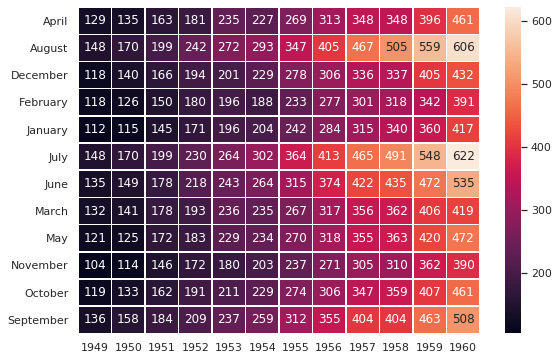

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="white", palette="muted", color_codes=True)


dict_vars = {1949: {'January': 112, 'February': 118, 'March': 132, 'April': 129, 'May': 121, 'June': 135, 'July': 148, 'August': 148, 'September': 136, 'October': 119, 'November': 104, 'December': 118}, 
             1950: {'January': 115, 'February': 126, 'March': 141, 'April': 135, 'May': 125, 'June': 149, 'July': 170, 'August': 170, 'September': 158, 'October': 133, 'November': 114, 'December': 140}, 1951: {'January': 145, 'February': 150, 'March': 178, 'April': 163, 'May': 172, 'June': 178, 'July': 199, 'August': 199, 'September': 184, 'October': 162, 'November': 146, 'December': 166}, 1952: {'January': 171, 'February': 180, 'March': 193, 'April': 181, 'May': 183, 'June': 218, 'July': 230, 'August': 242, 'September': 209, 'October': 191, 'November': 172, 'December': 194}, 1953: {'January': 196, 'February': 196, 'March': 236, 'April': 235, 'May': 229, 'June': 243, 'July': 264, 'August': 272, 'September': 237, 'October': 211, 'November': 180, 'December': 201}, 
             1954: {'January': 204, 'February': 188, 'March': 235, 'April': 227, 'May': 234, 'June': 264, 'July': 302, 'August': 293, 'September': 259, 'October': 229, 'November': 203, 'December': 229}, 
             1955: {'January': 242, 'February': 233, 'March': 267, 'April': 269, 'May': 270, 'June': 315, 'July': 364, 'August': 347, 'September': 312, 'October': 274, 'November': 237, 'December': 278}, 1956: {'January': 284, 'February': 277, 'March': 317, 'April': 313, 'May': 318, 'June': 374, 'July': 413, 'August': 405, 'September': 355, 'October': 306, 'November': 271, 'December': 306}, 1957: {'January': 315, 'February': 301, 'March': 356, 'April': 348, 'May': 355, 'June': 422, 'July': 465, 'August': 467, 'September': 404, 'October': 347, 'November': 305, 'December': 336}, 1958: {'January': 340, 'February': 318, 'March': 362, 'April': 348, 'May': 363, 'June': 435, 'July': 491, 'August': 505, 'September': 404, 'October': 359, 'November': 310, 'December': 337}, 
             1959: {'January': 360, 'February': 342, 'March': 406, 'April': 396, 'May': 420, 'June': 472, 'July': 548, 'August': 559, 'September': 463, 'October': 407, 'November': 362, 'December': 405}, 
             1960: {'January': 417, 'February': 391, 'March': 419, 'April': 461, 'May': 472, 'June': 535, 'July': 622, 'August': 606, 'September': 508, 'October': 461, 'November': 390, 'December': 432}}
flights = pd.DataFrame(dict_vars)
# print(flights)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)


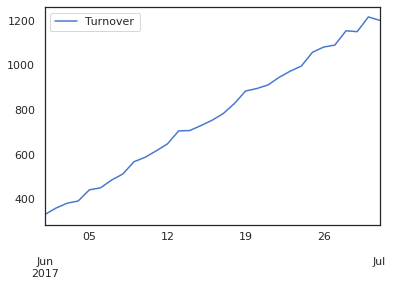

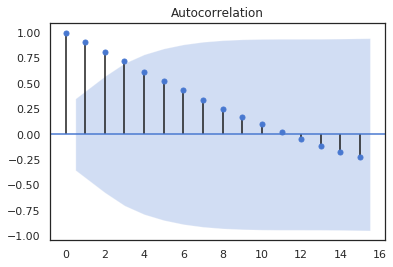

In [37]:
from random import randrange
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def generateData(startDate, endDate):
    df = pd.DataFrame([300+i*30+randrange(50) for i in range(31)],
                      columns=['Turnover'],
                      index=pd.date_range(startDate, endDate, freq='D'))
    return df

# 生成测试数据，模拟某商店营业额
data = generateData('20170601',  '20170701')
# print(data)

# 绘制时序图
data.plot()

# 绘制自相关图
plot_acf(data)

plt.show()